# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Fetch dataset
auction_verification = fetch_ucirepo(id=713)

# Data (as pandas dataframes)
X = auction_verification.data.features
y = auction_verification.data.targets

# Display metadata
print(auction_verification.metadata)

# Display variable information
print(auction_verification.variables)


{'uci_id': 713, 'name': 'Auction Verification', 'repository_url': 'https://archive.ics.uci.edu/dataset/713/auction+verification', 'data_url': 'https://archive.ics.uci.edu/static/public/713/data.csv', 'abstract': 'We modeled a simultaneous multi-round auction with BPMN models, transformed the latter to Petri nets, and used a model checker to verify whether certain outcomes of the auction are possible or not.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 2043, 'num_features': 7, 'feature_types': [], 'demographics': [], 'target_col': ['verification.result', 'verification.time'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Sun Apr 24 2022', 'dataset_doi': '10.24432/C52K6N', 'creators': ['Elaheh Ordoni', 'Jakob Bach', 'Ann-Katrin Fleck', 'Jakob Bach'], 'intro_paper': {'title': 'Analyzing and Predicting Verification of Data-Aware Pro

In [2]:
# Drop columns with empty values
X.dropna(axis=1, inplace=True)

# Check and drop columns with zero variance
zero_variance_columns = [col for col in X.columns if X[col].var() == 0]
X.drop(columns=zero_variance_columns, inplace=True)


C:\Users\Predator\AppData\Local\Temp\ipykernel_15256\2250720245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=1, inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_15256\2250720245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=zero_variance_columns, inplace=True)


**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

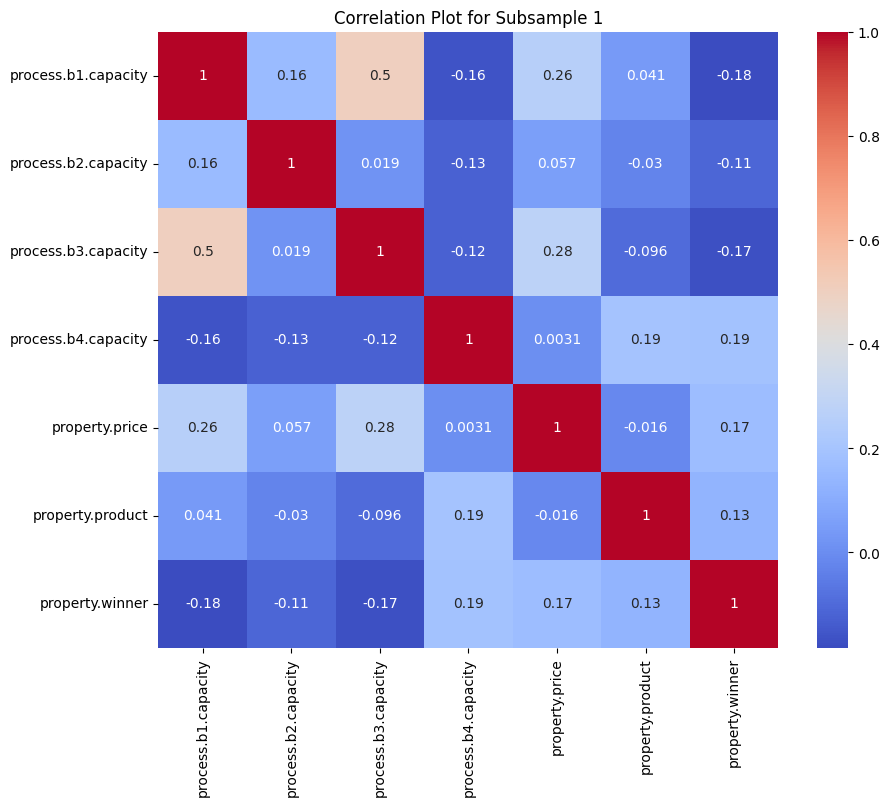

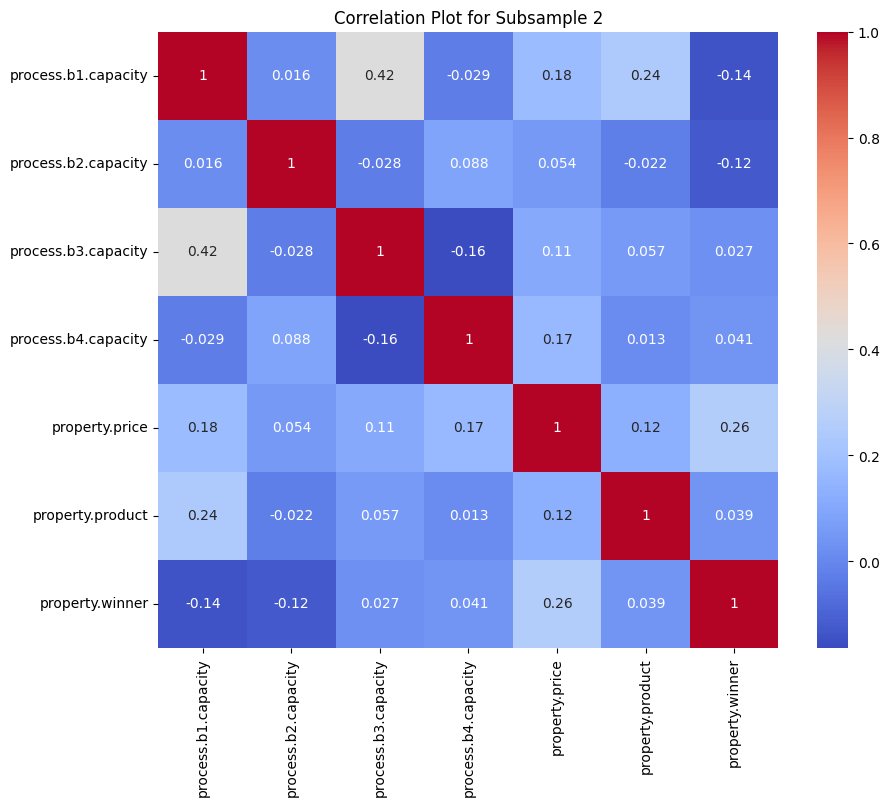

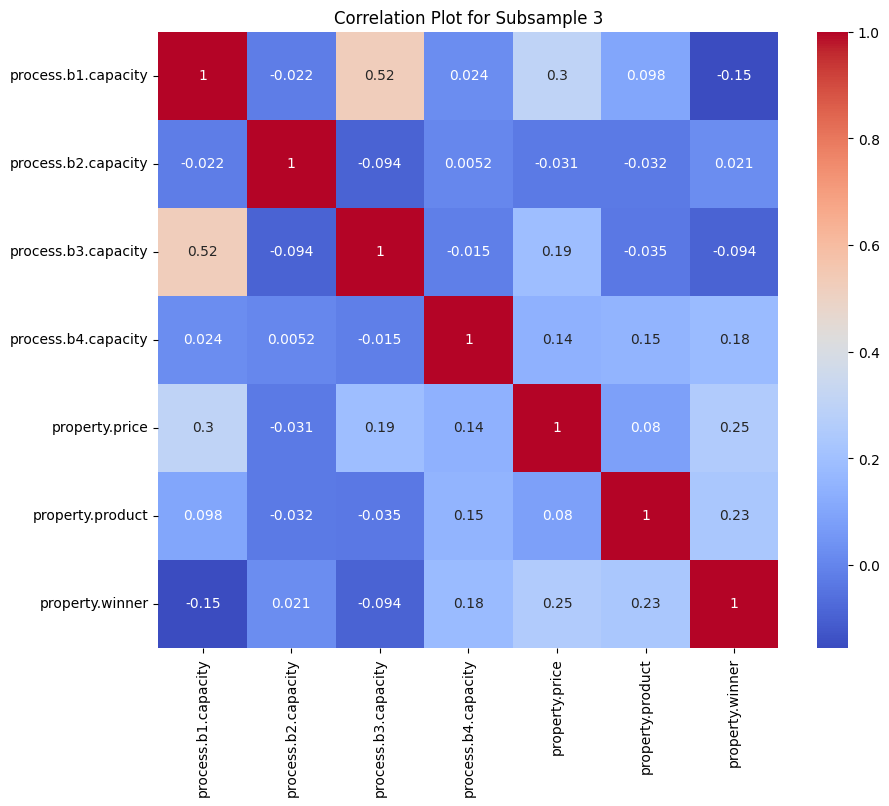

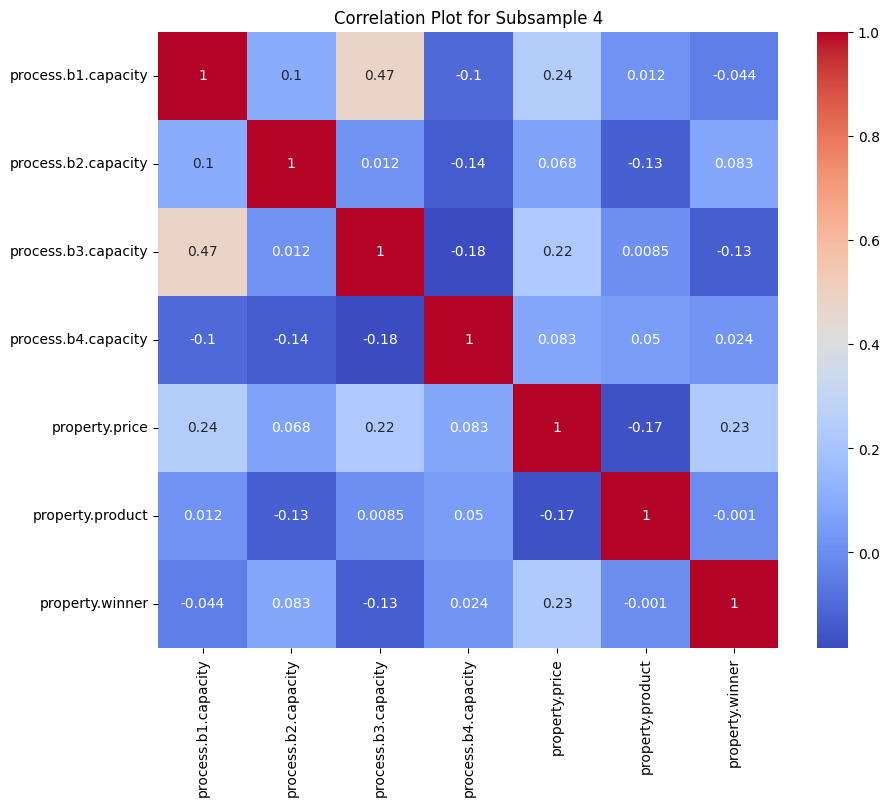

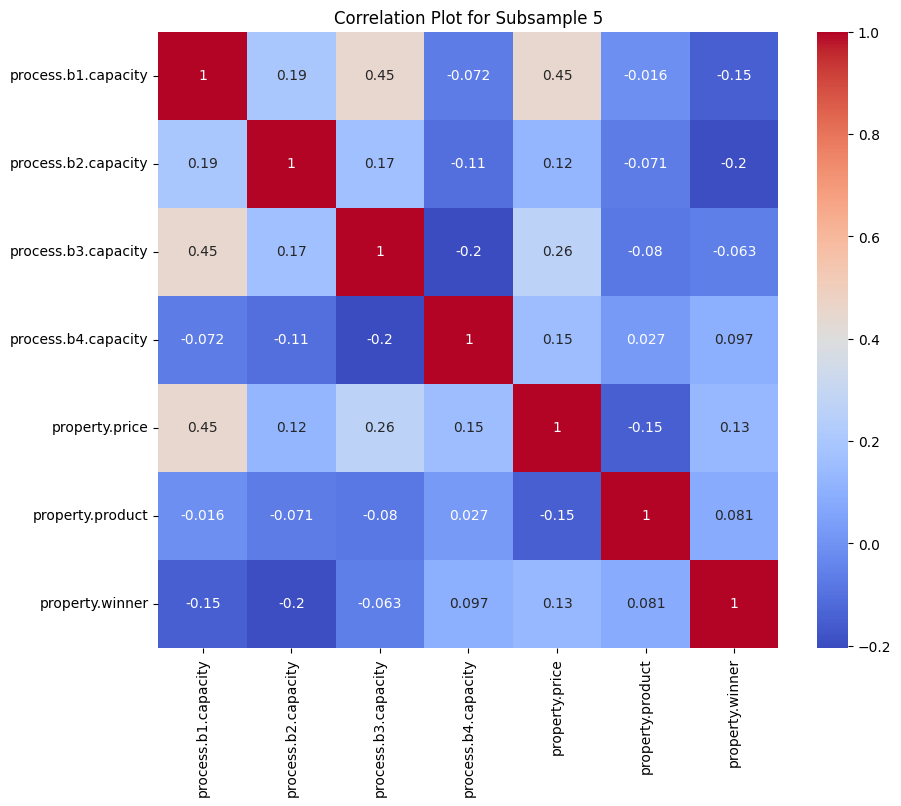

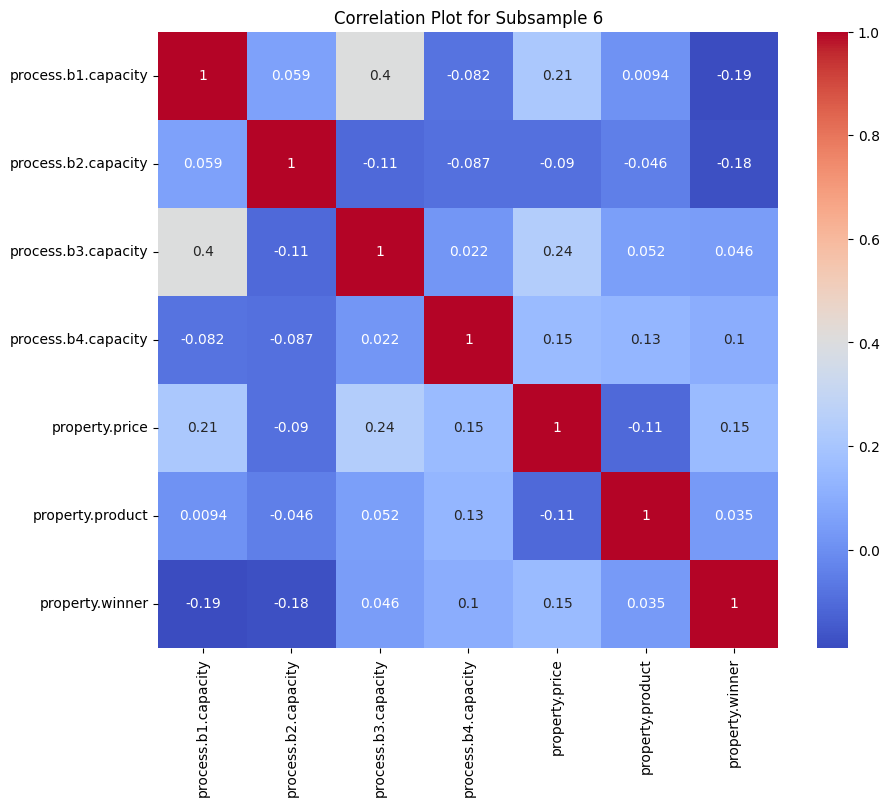

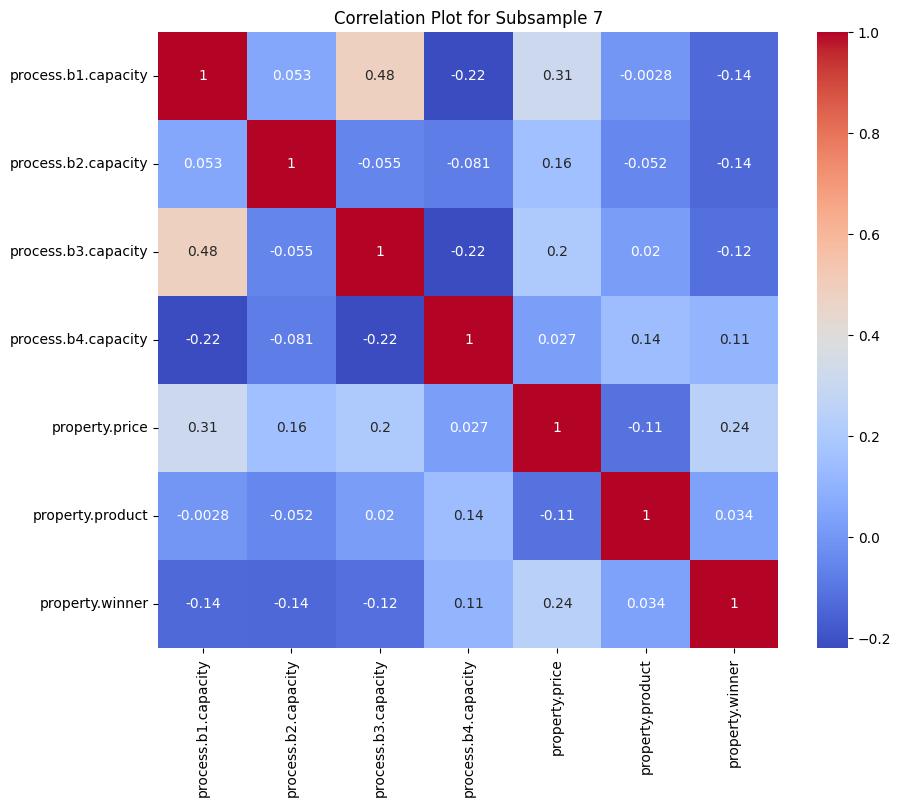

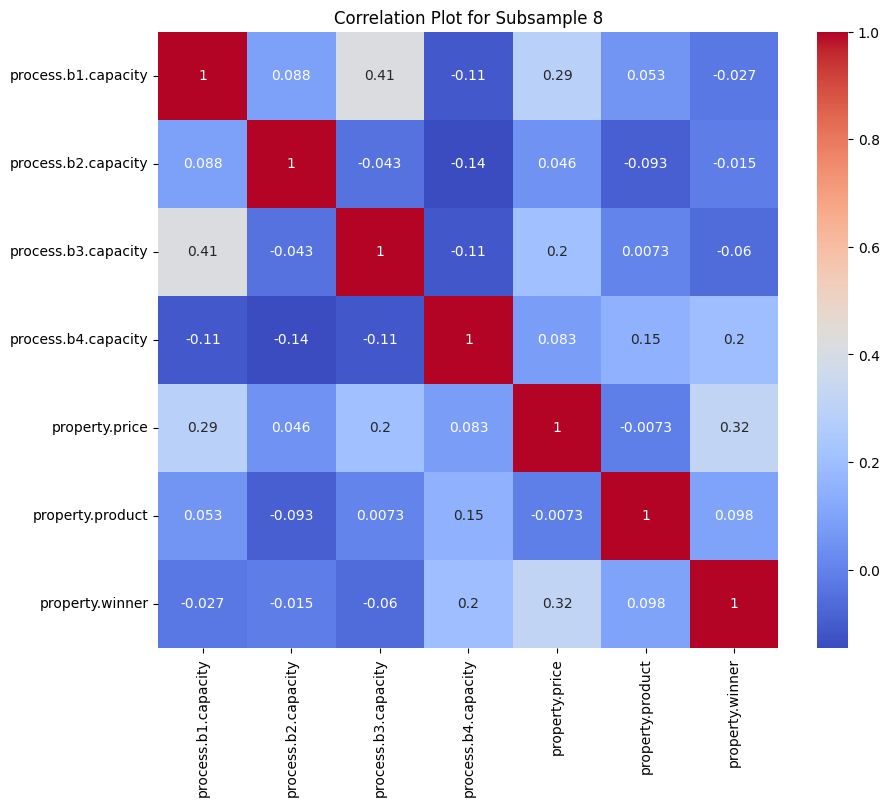

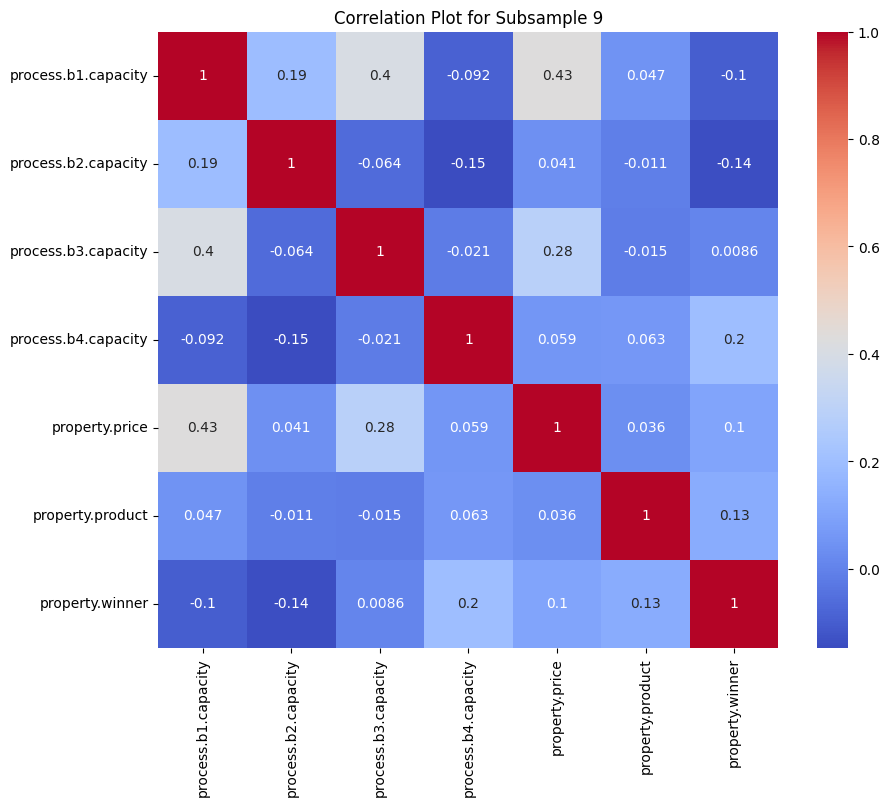

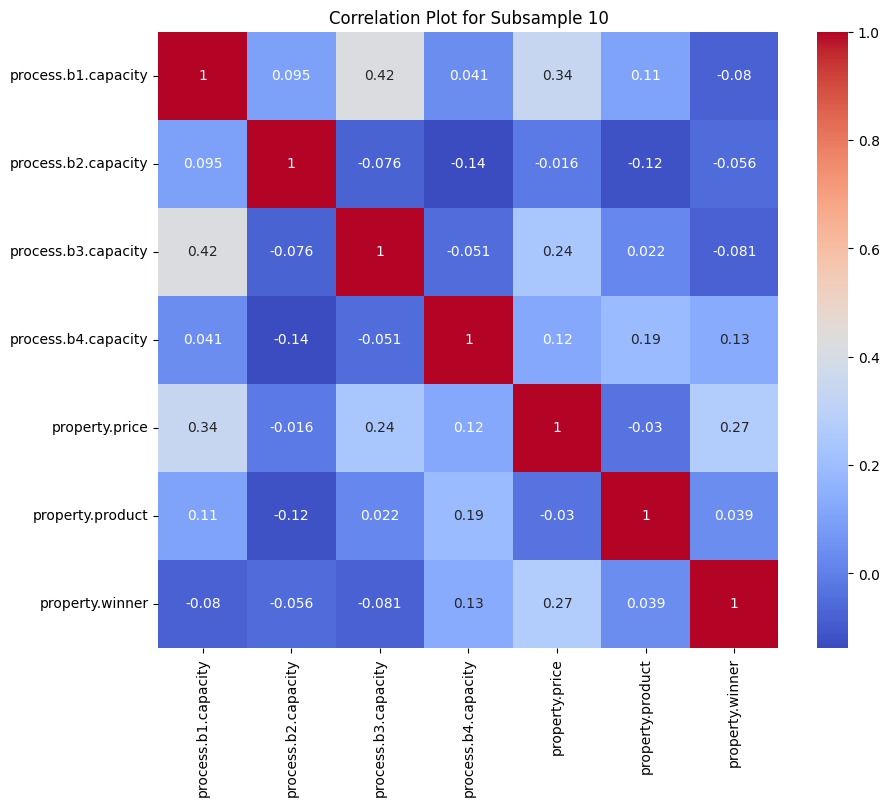

In [3]:
for i in range(10):
    subsample = X.sample(frac=0.1, random_state=i)
    corr_matrix = subsample.corr()
    plt.figure(figsize=(10, 8))  # Create a new figure
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Plot for Subsample {i+1}')
    plt.show()  # Display the plot


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

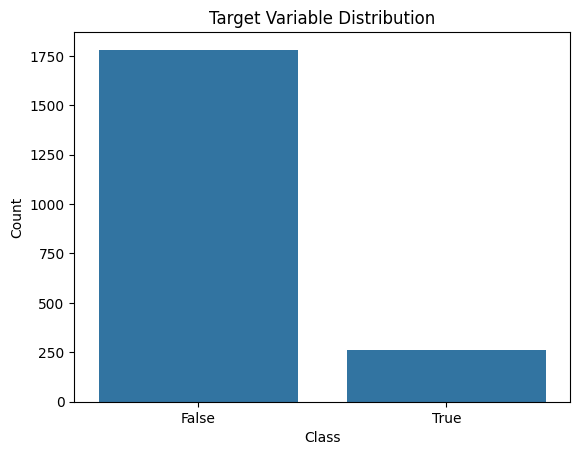

In [4]:
# Assuming 'y' is a pandas Series or DataFrame with a single column for target values
# If 'y' is a DataFrame, extract the single column as a Series
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

# Check class distribution
target_distribution = y.value_counts()

# Plotting the distribution
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

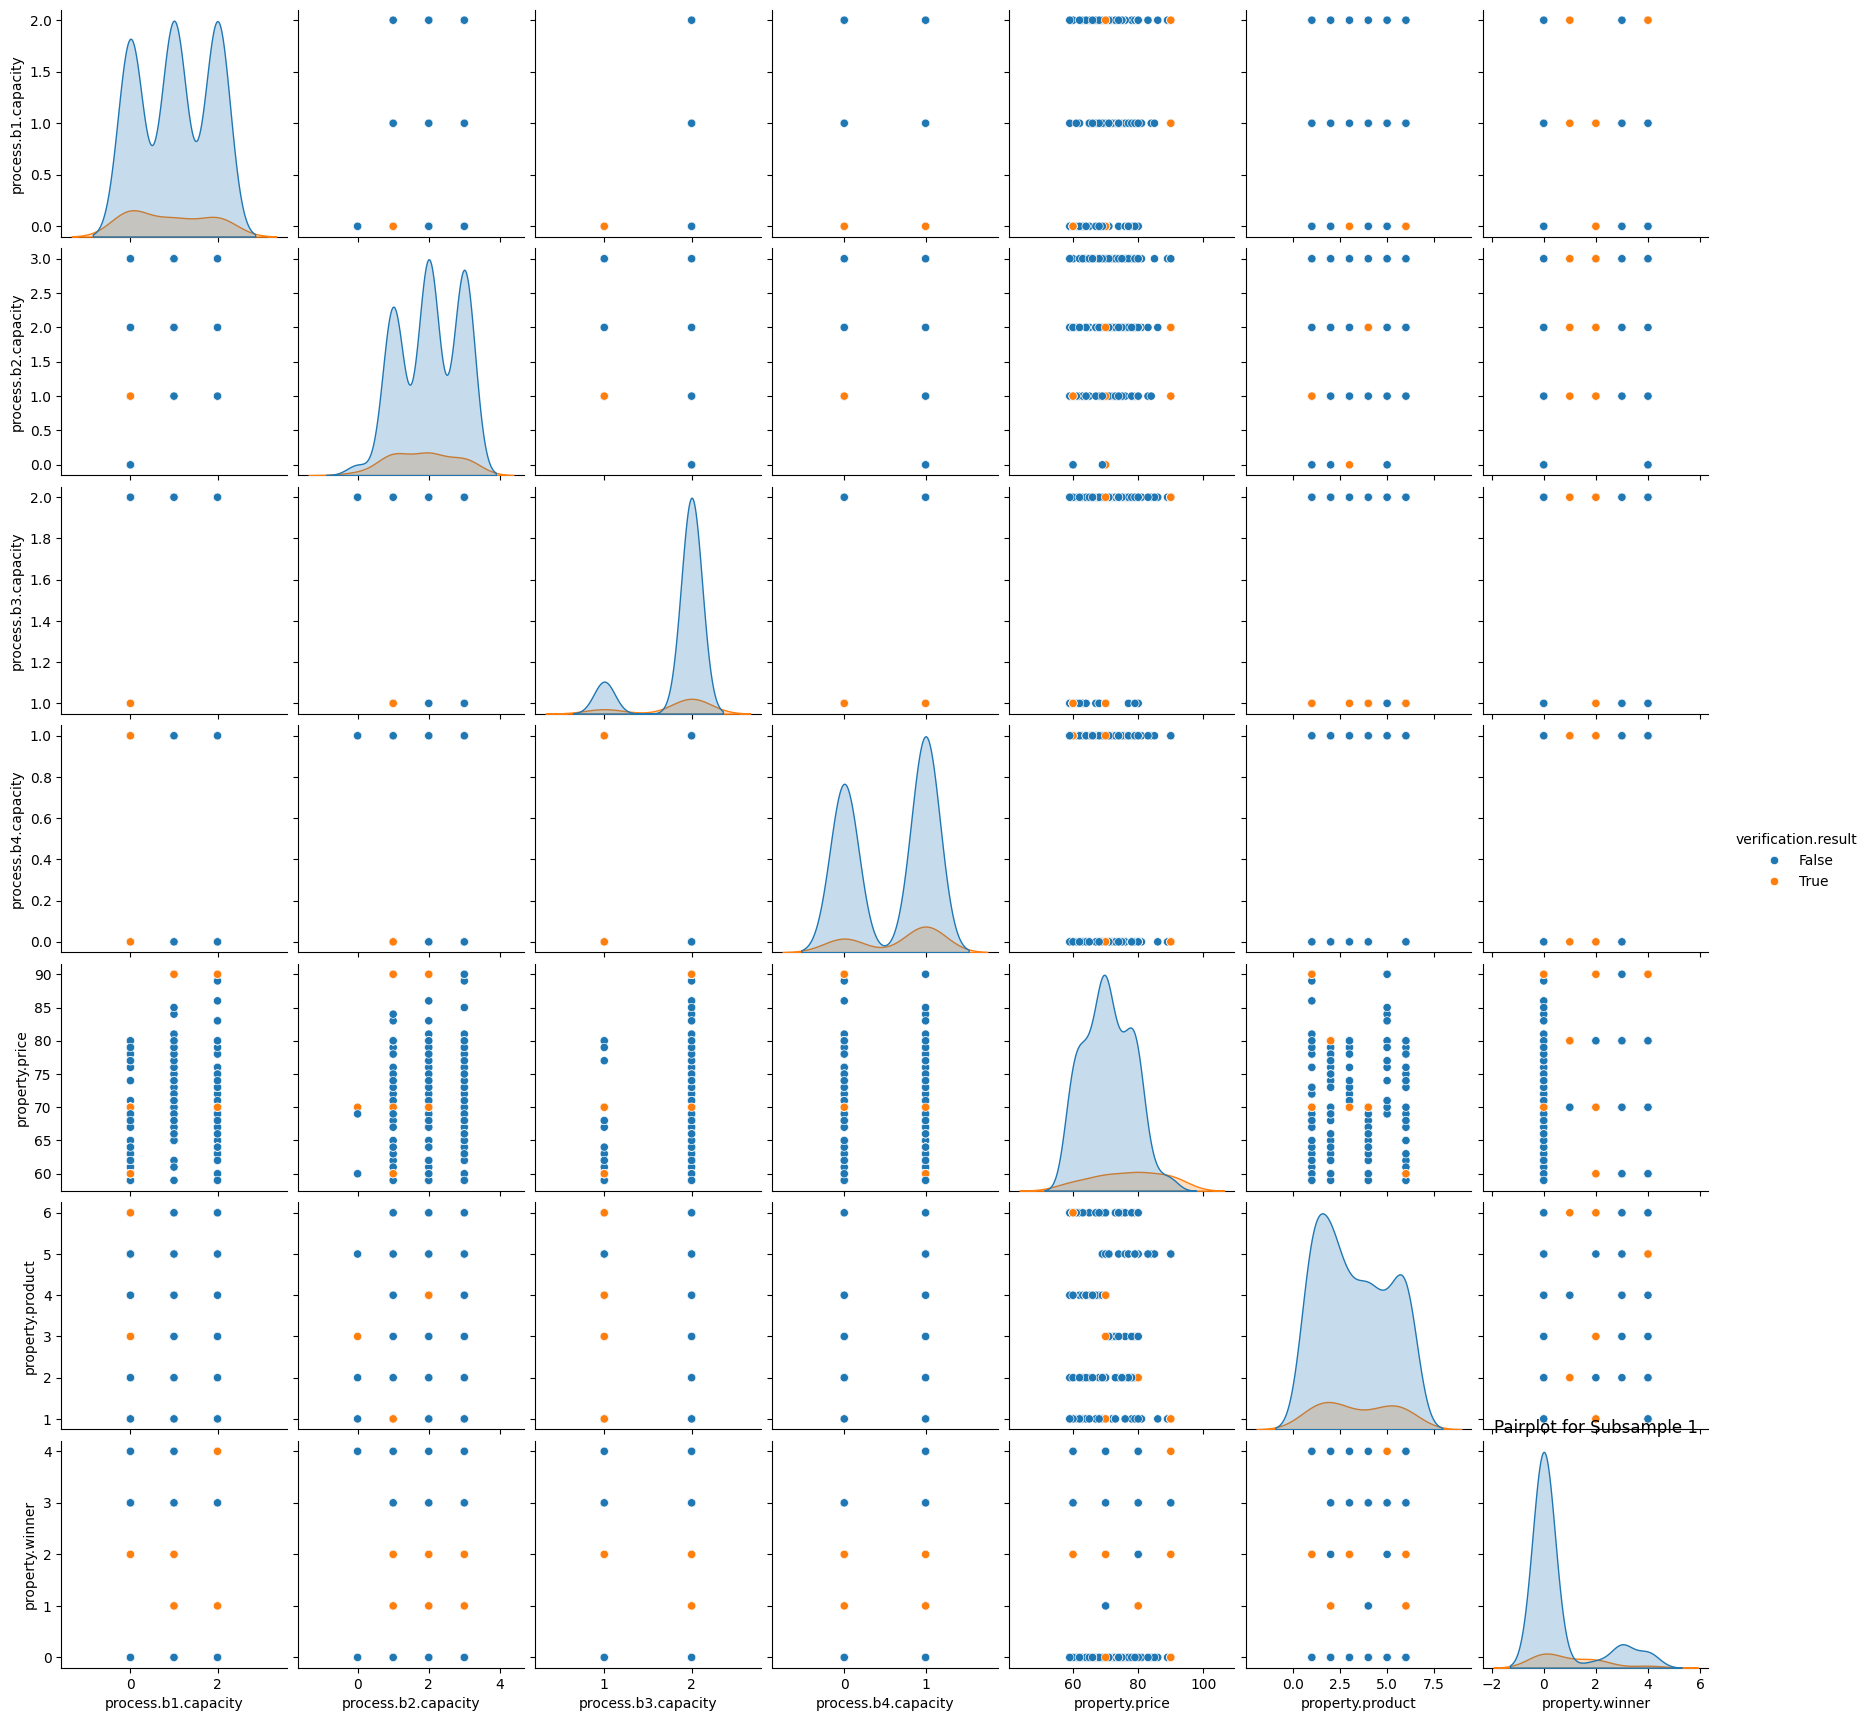

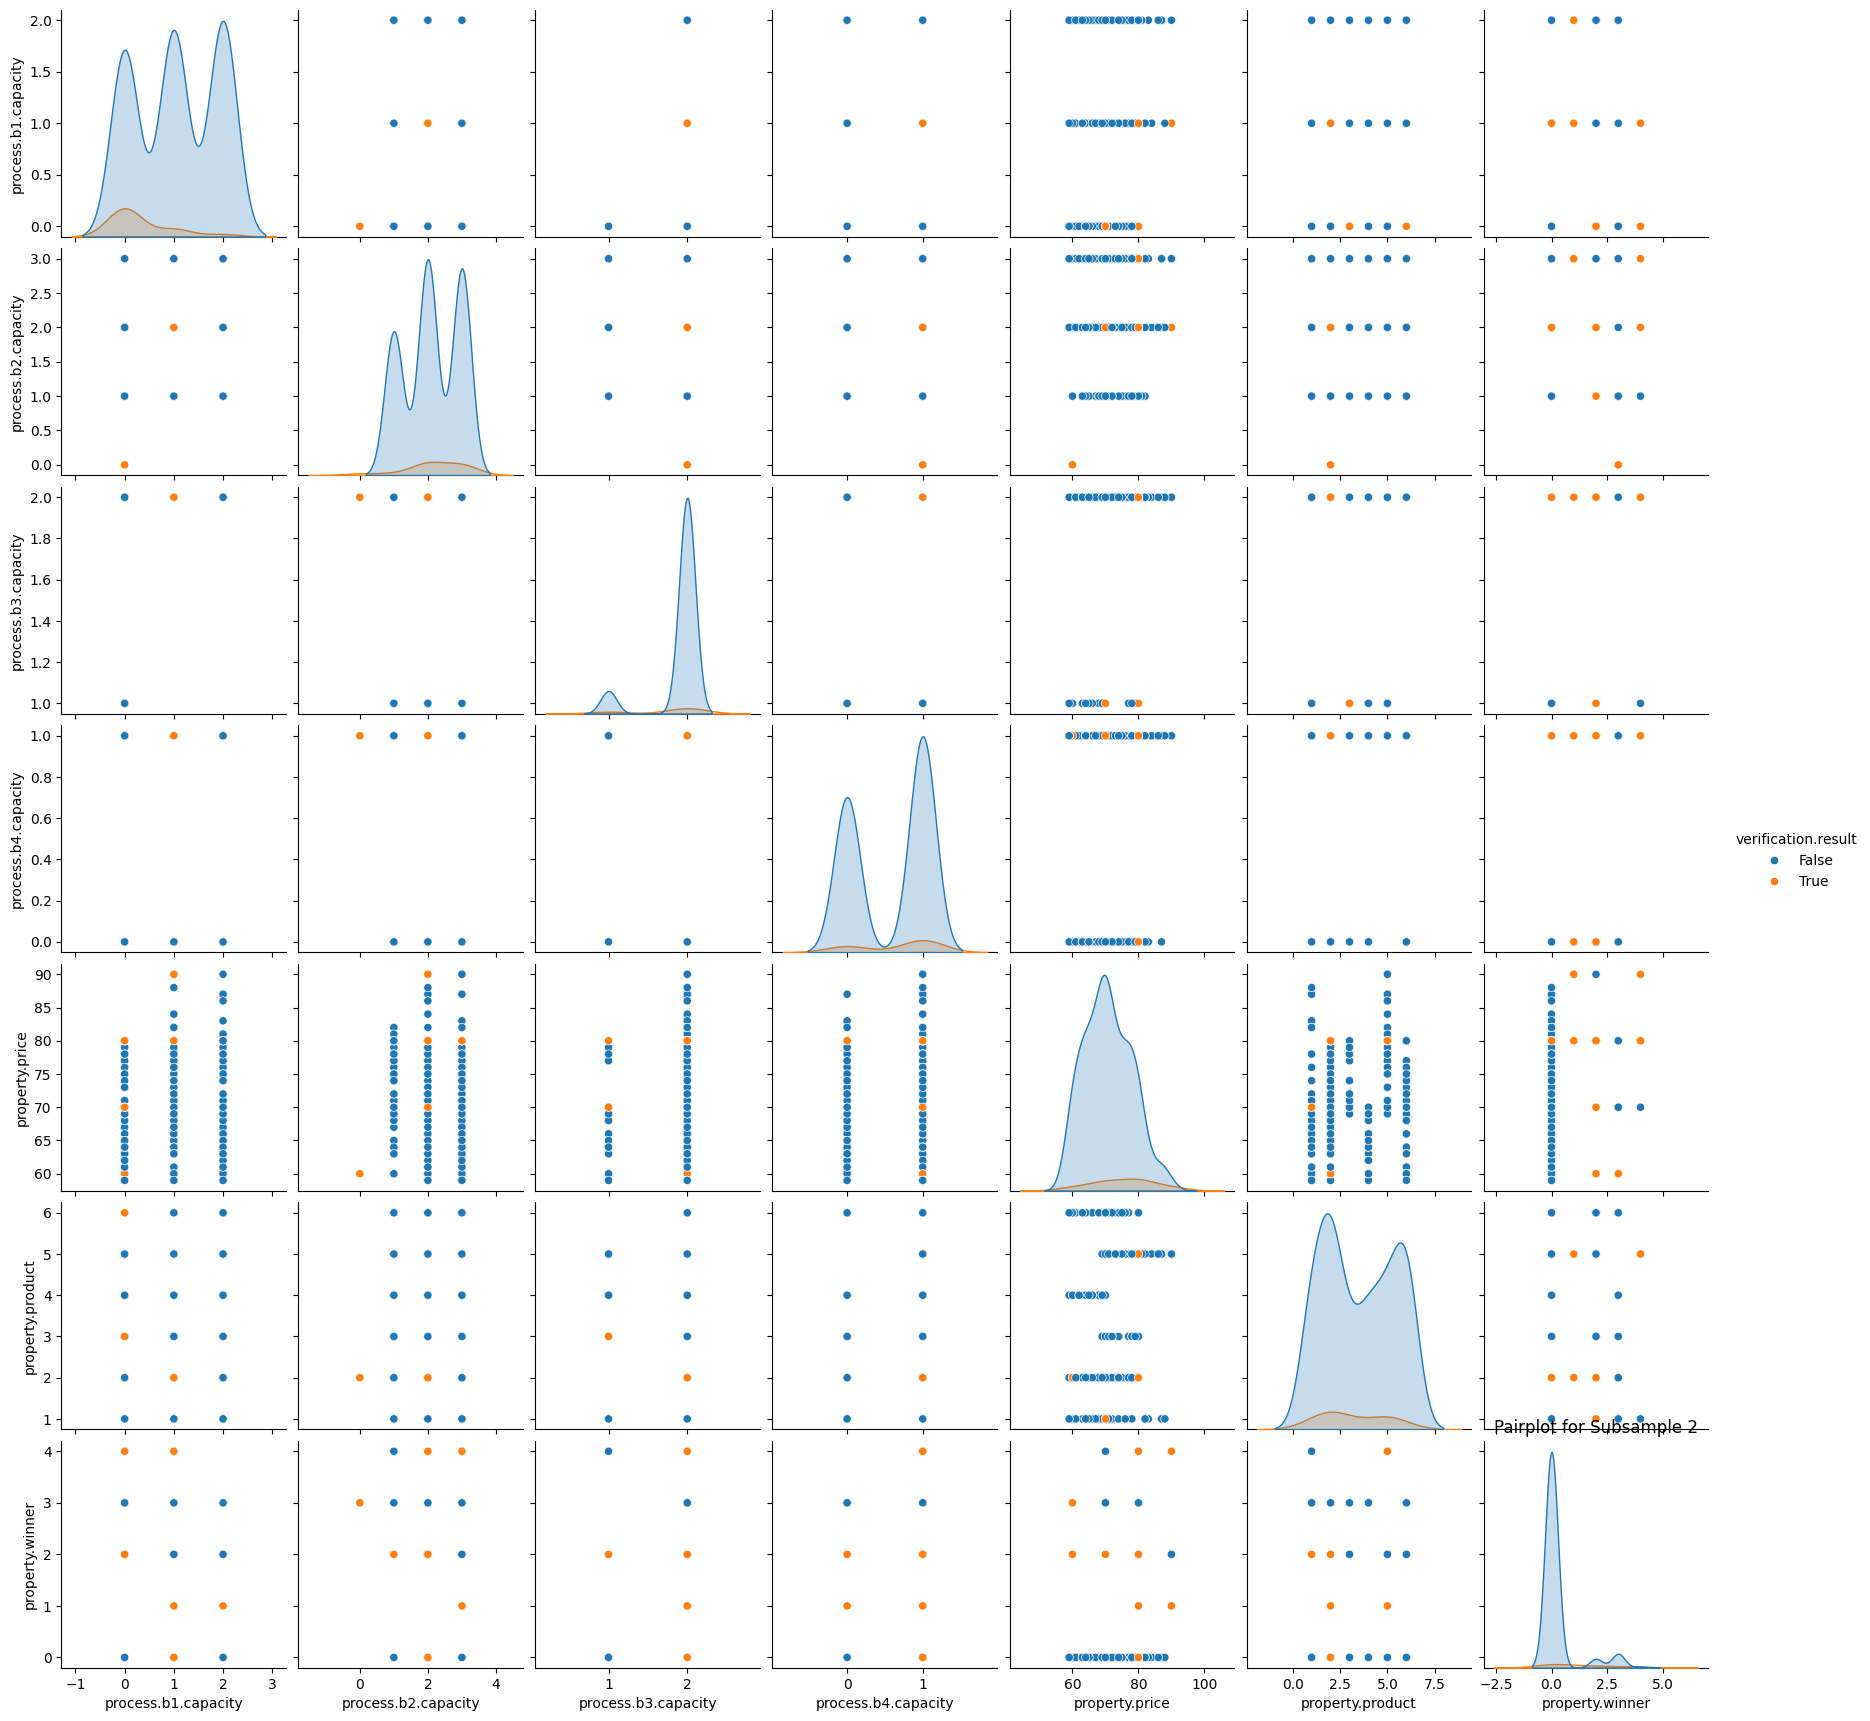

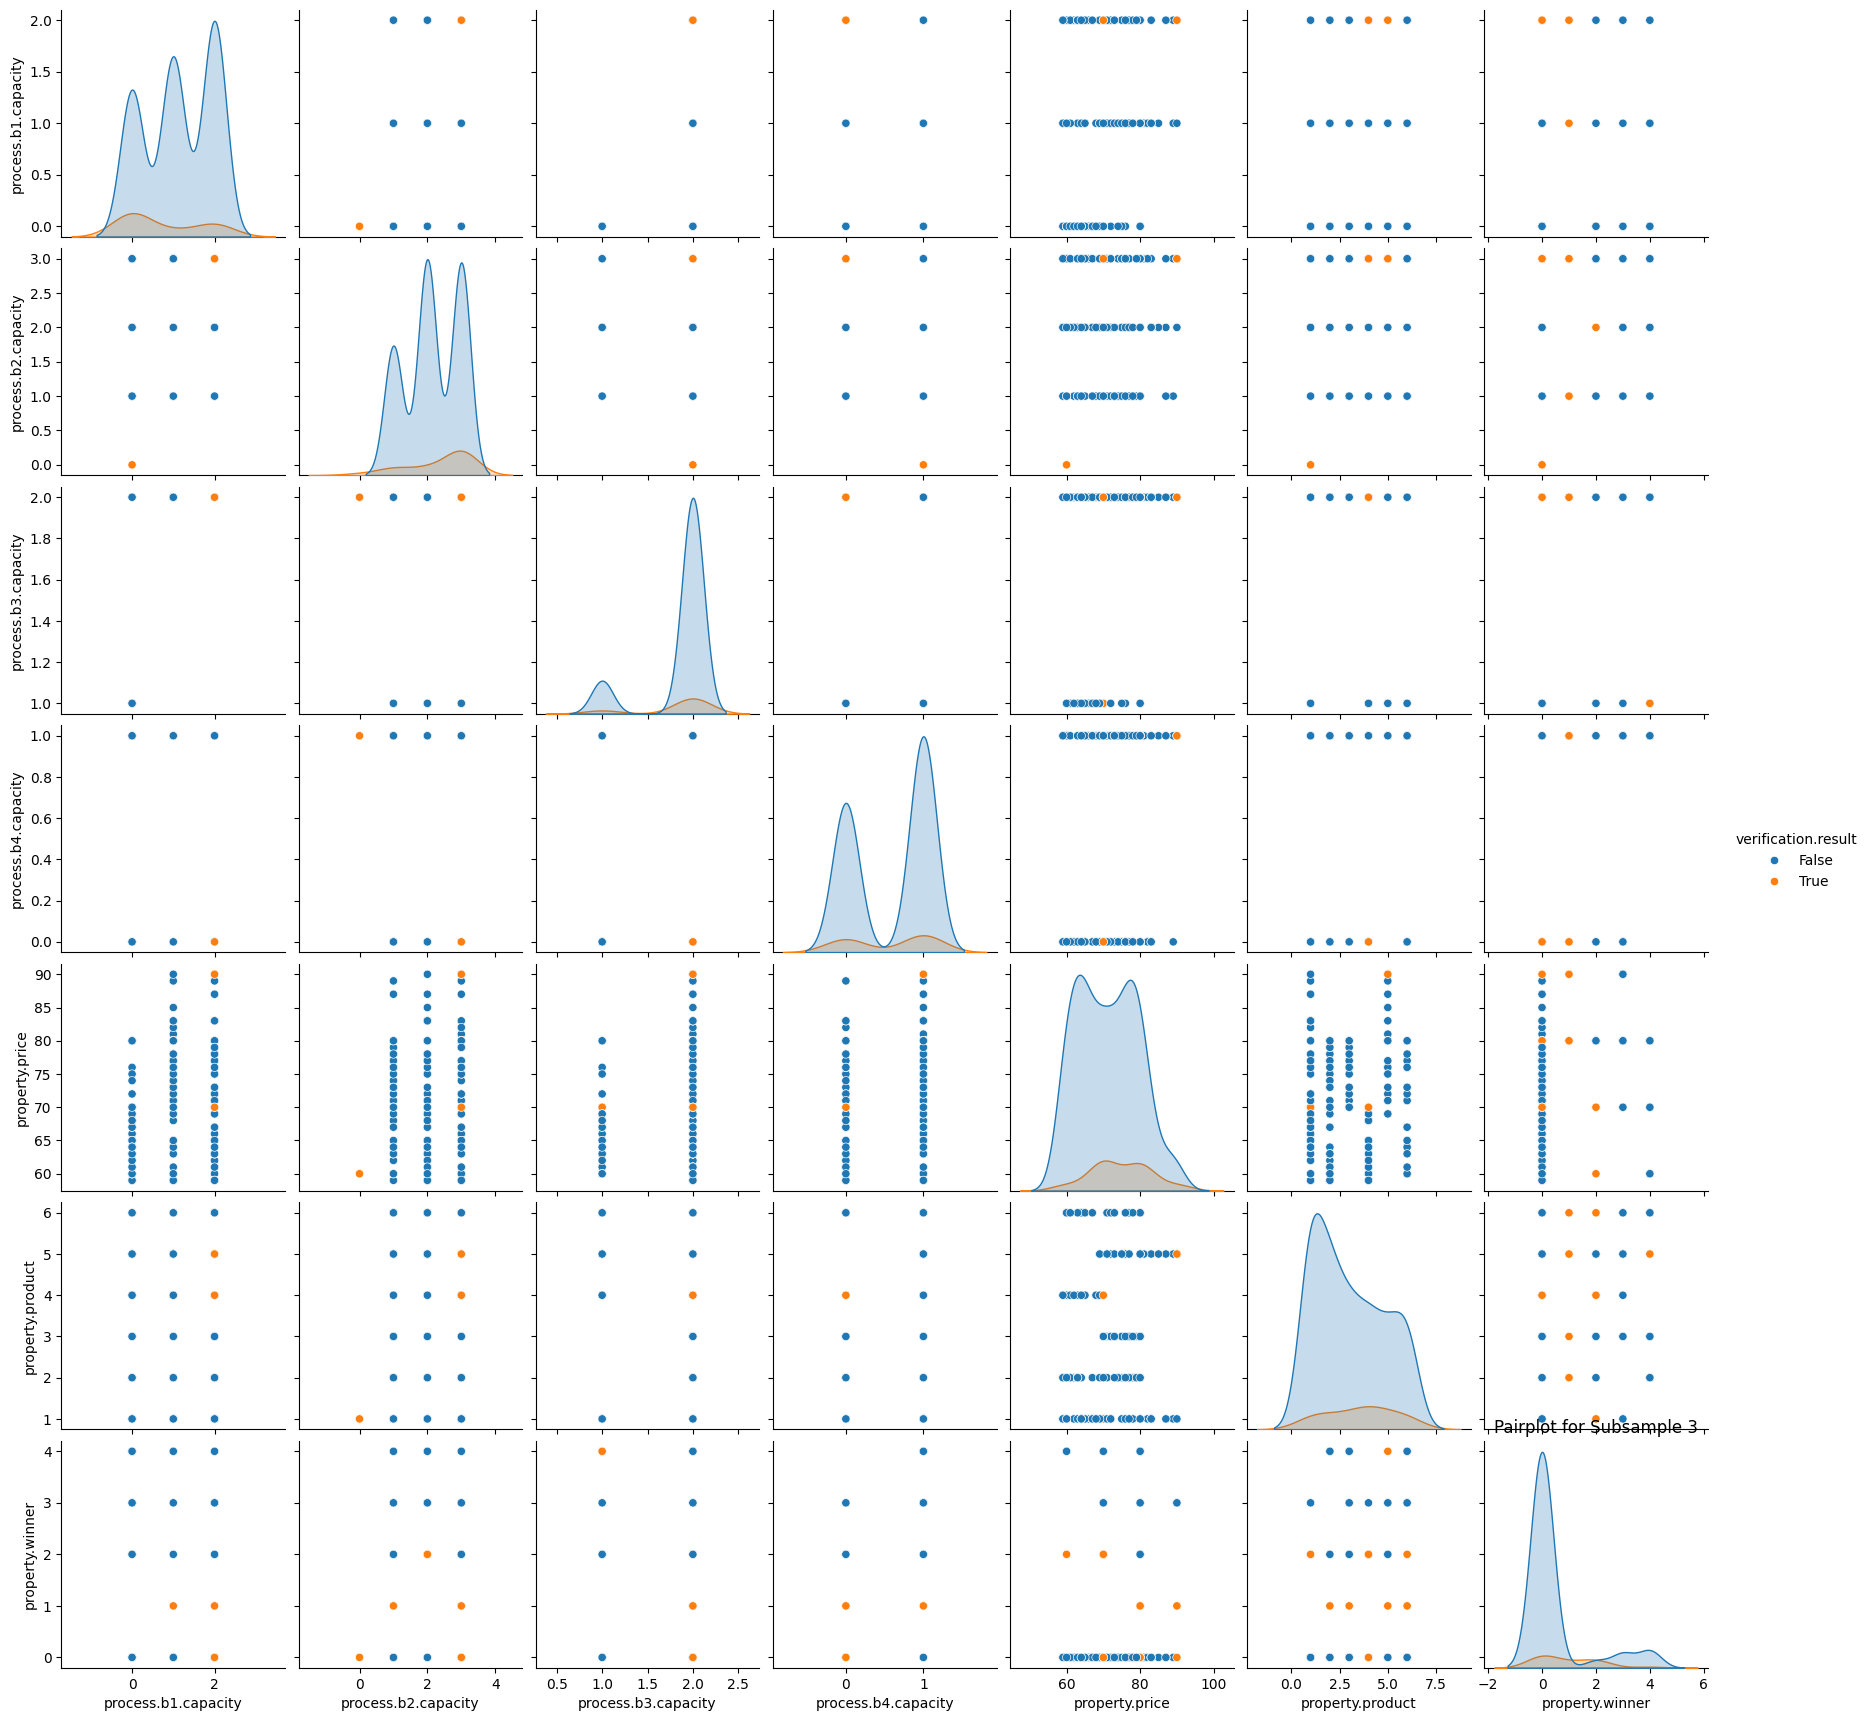

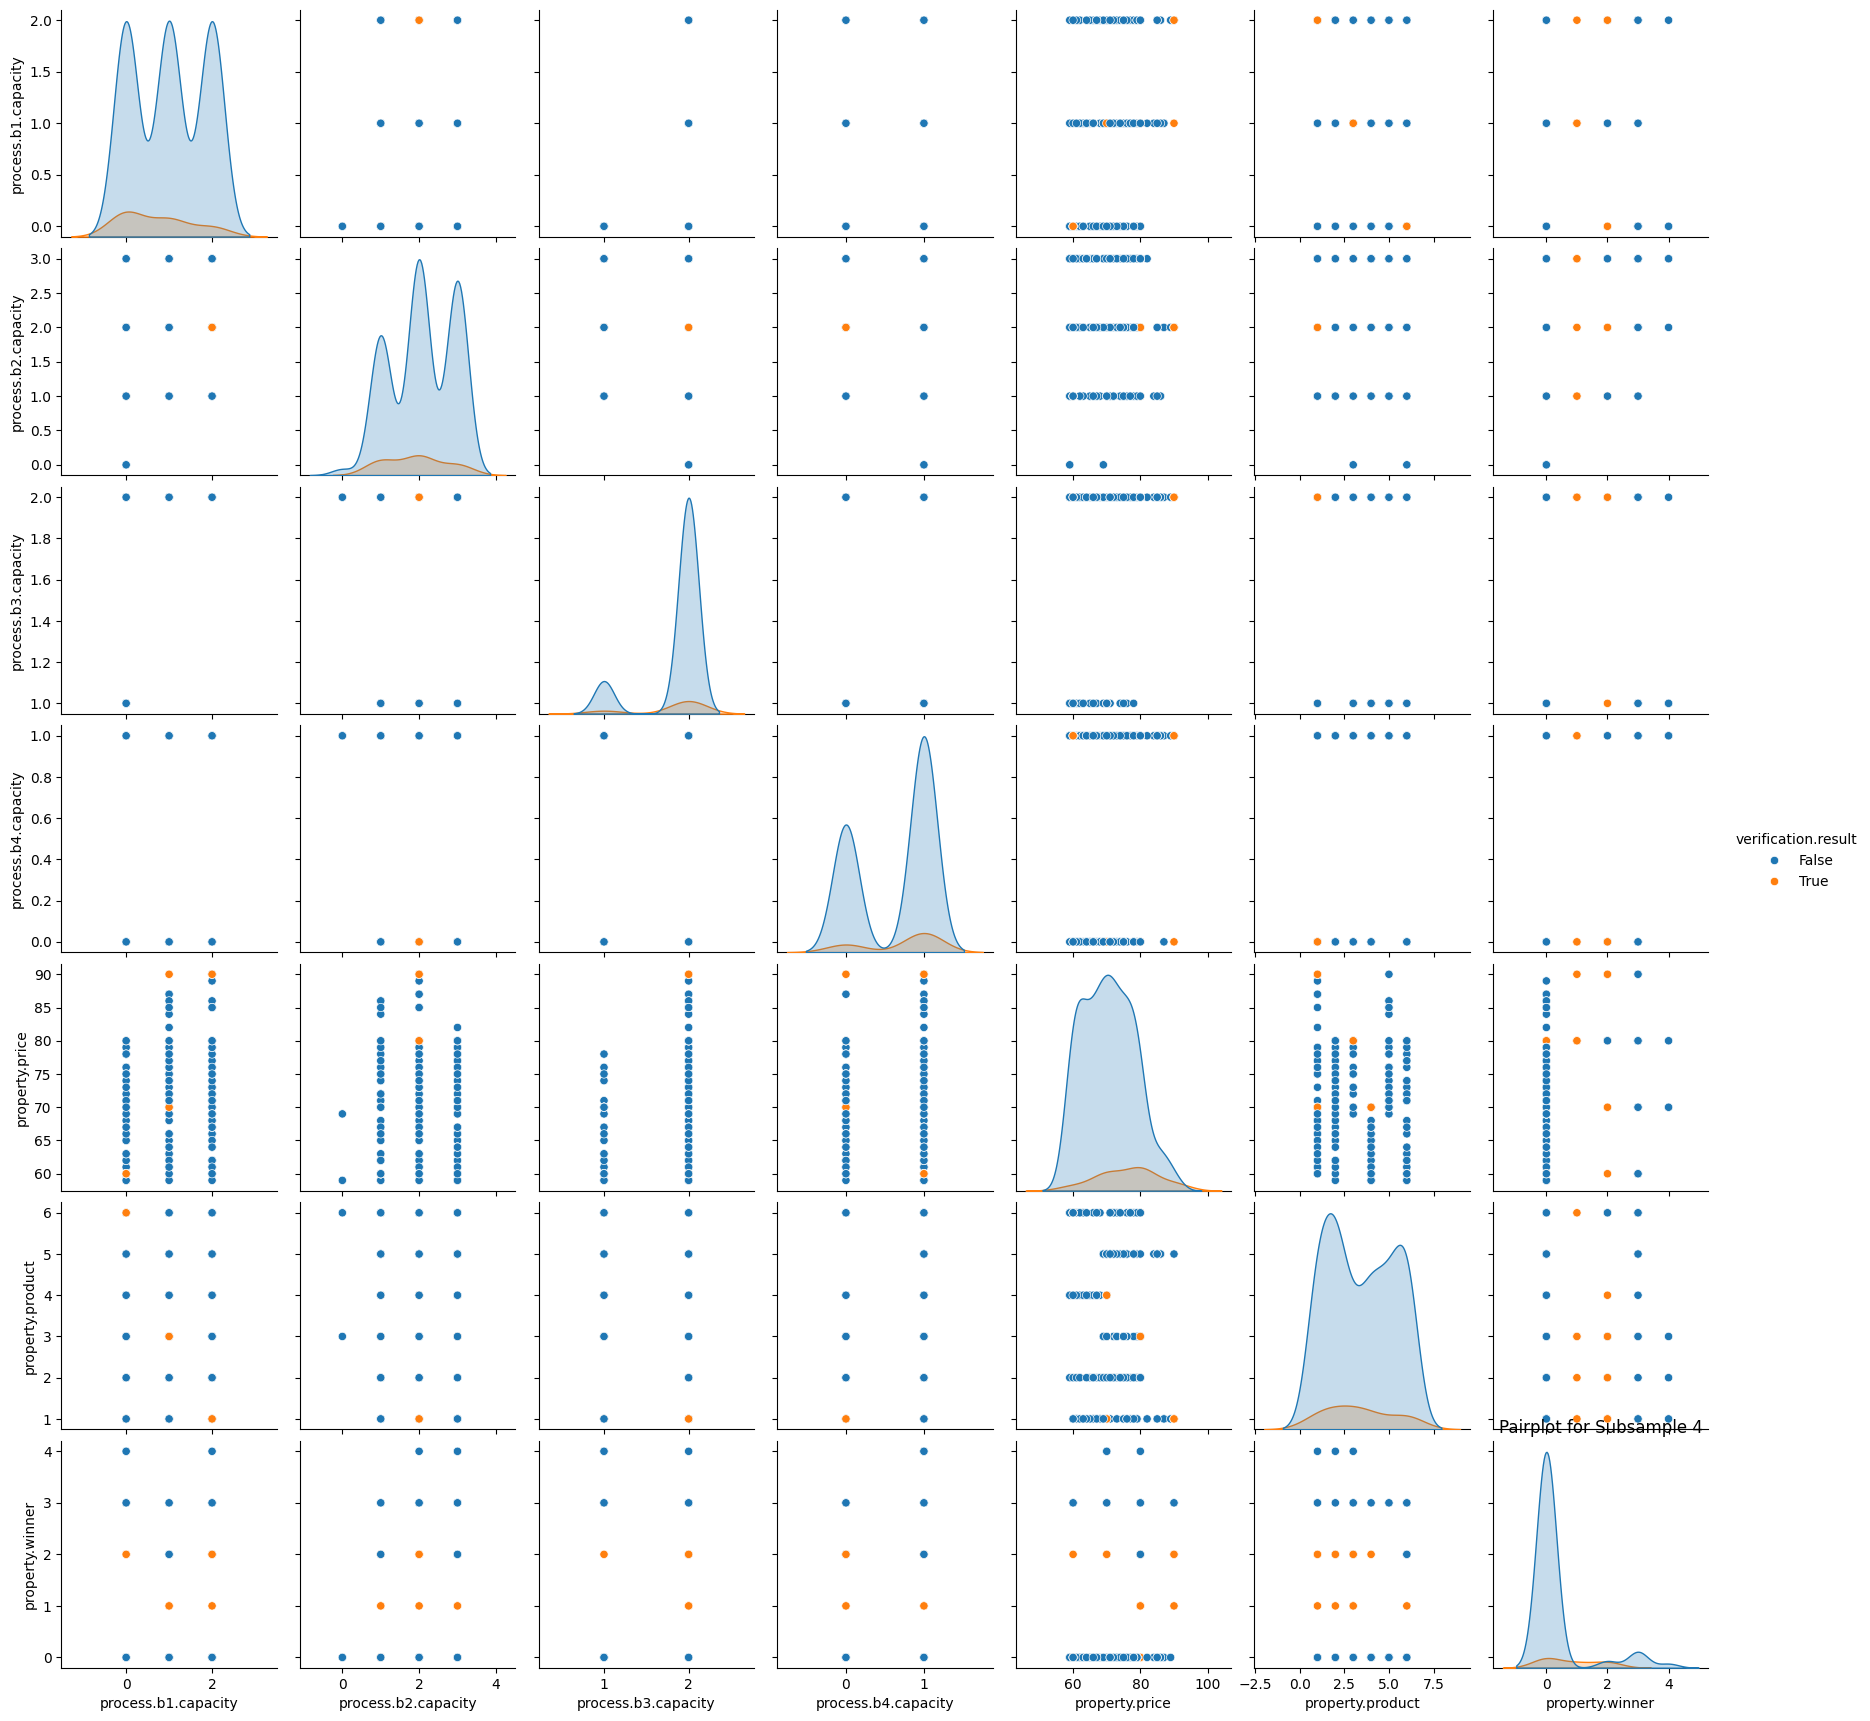

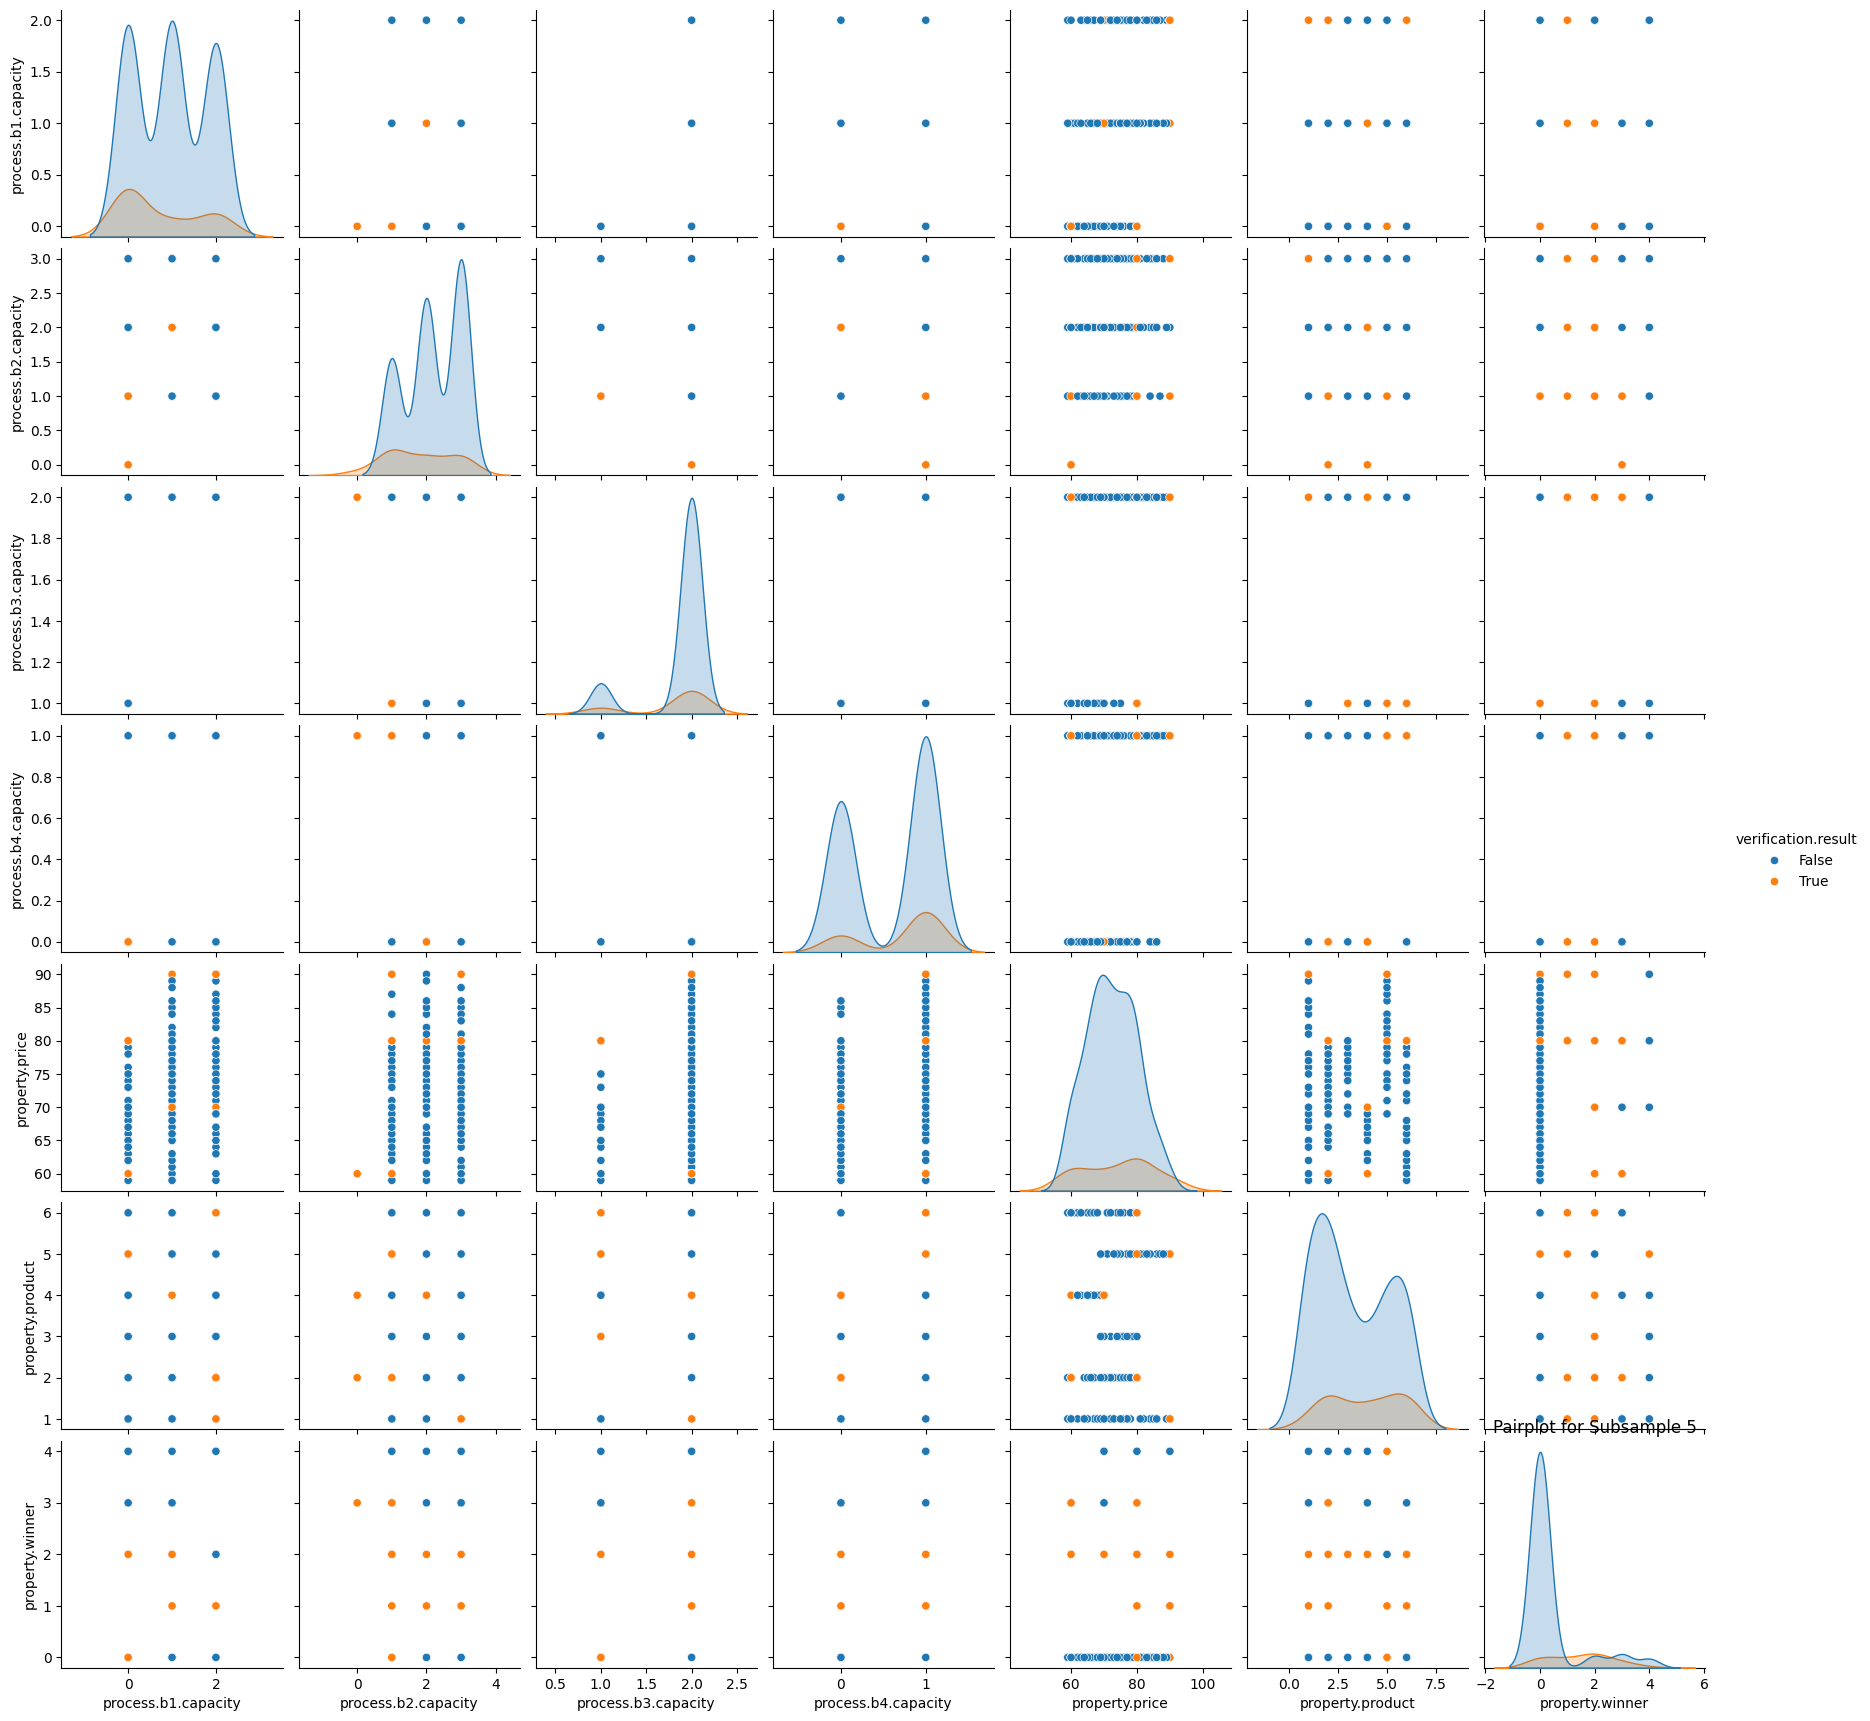

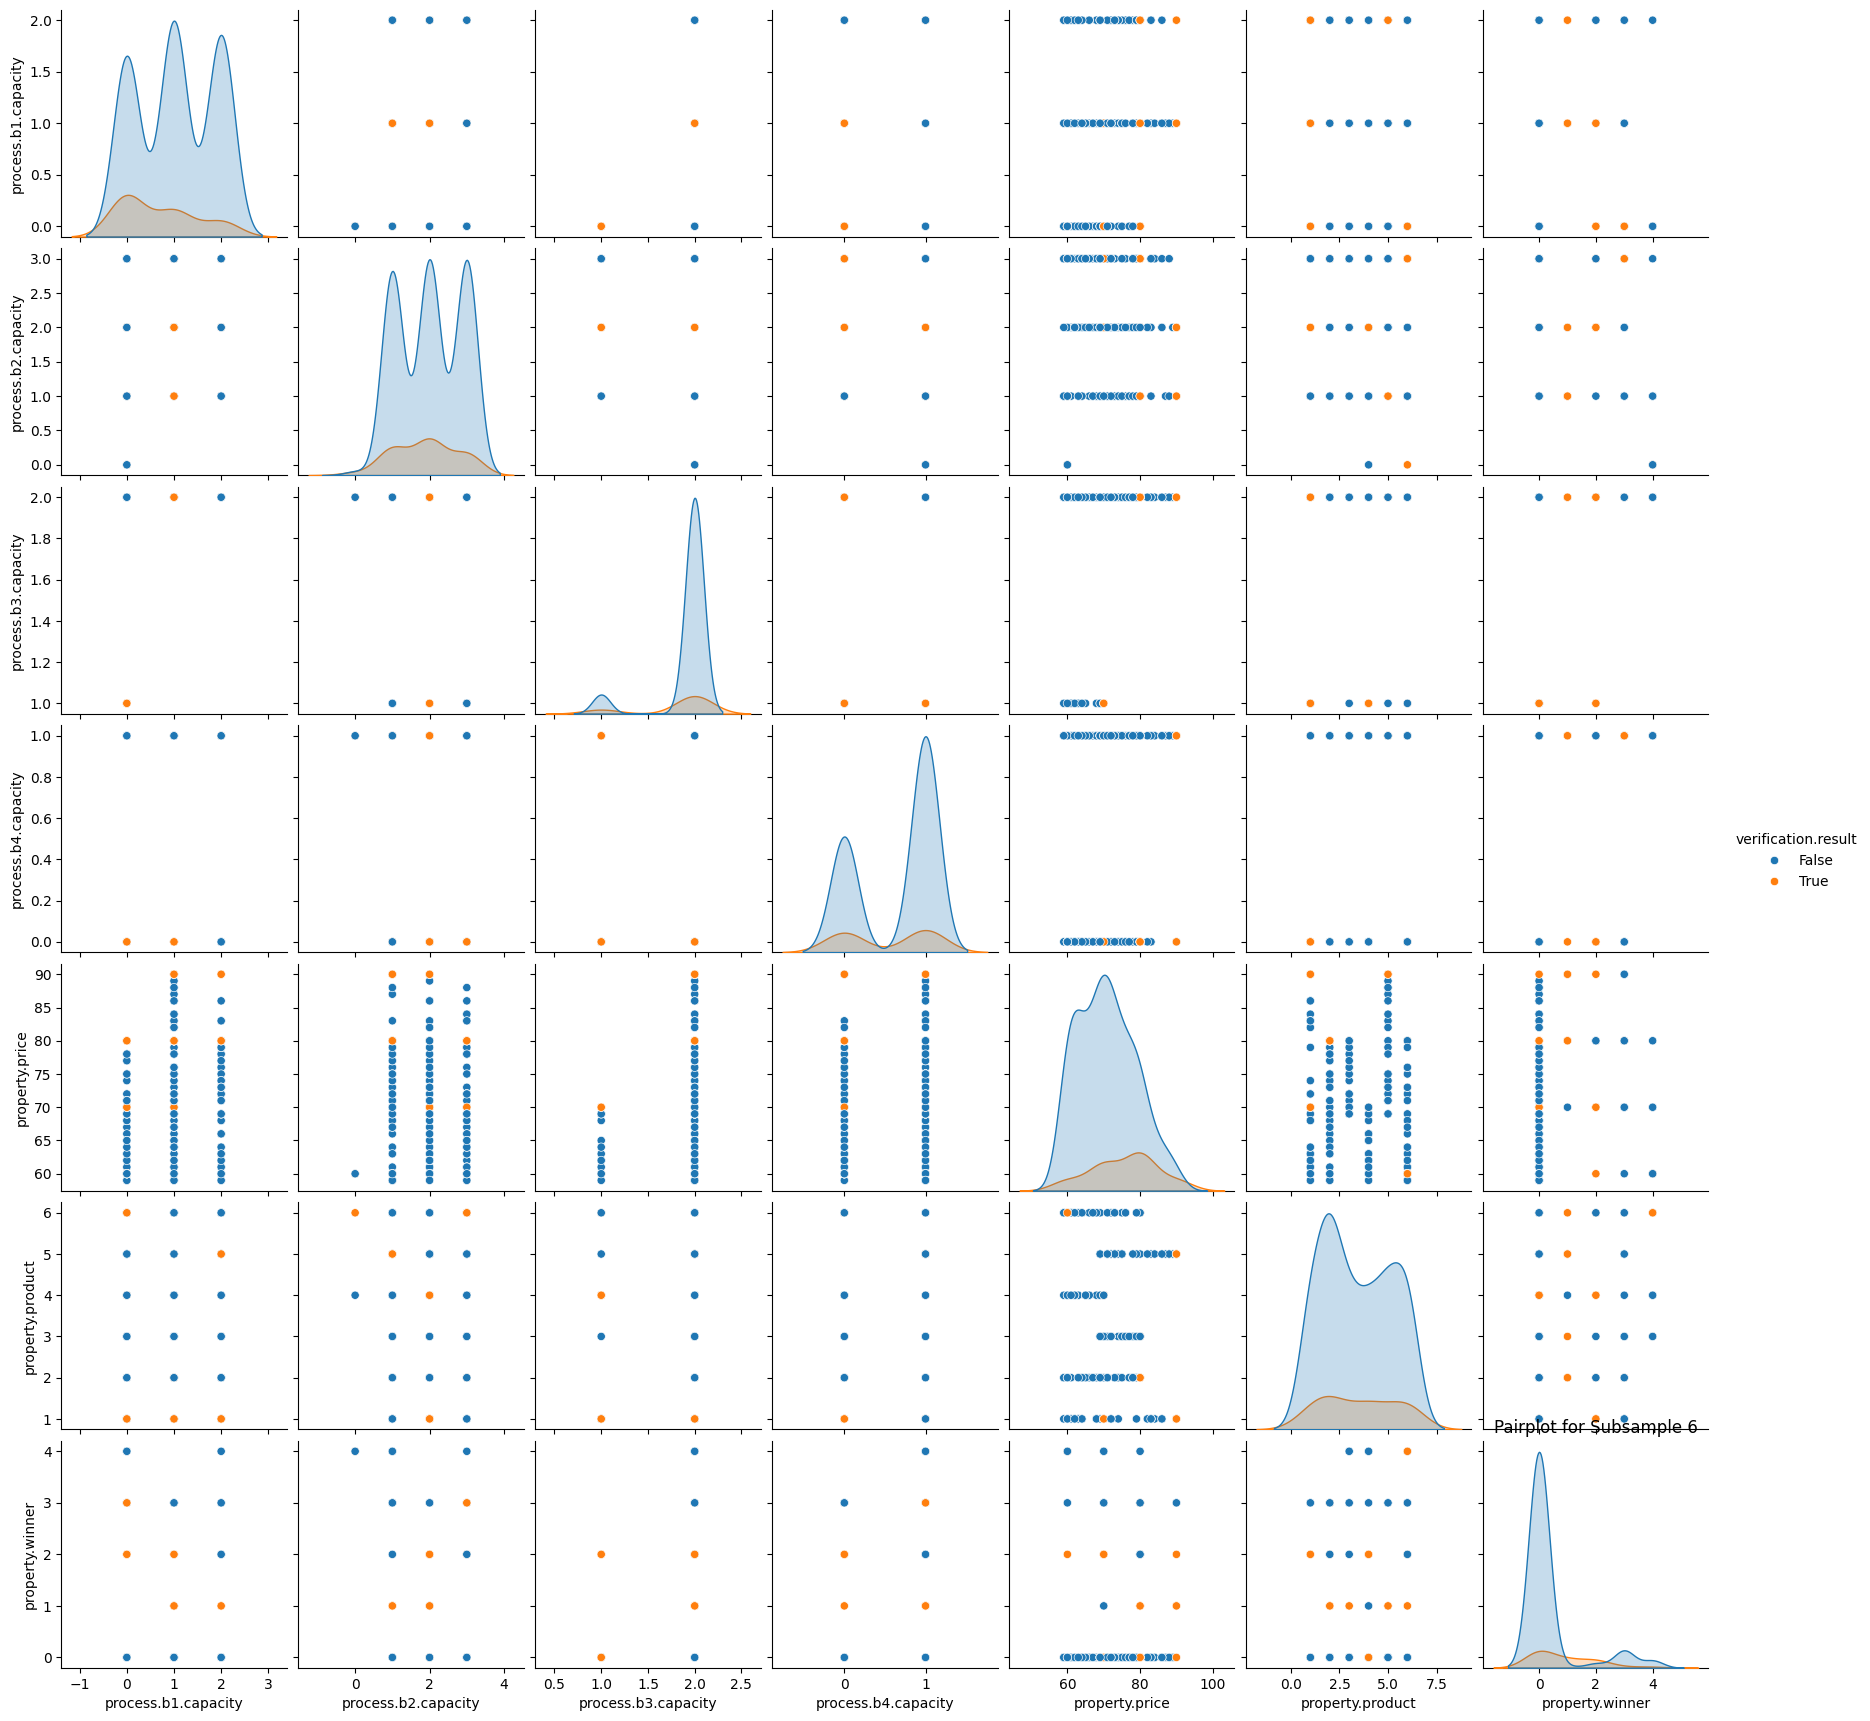

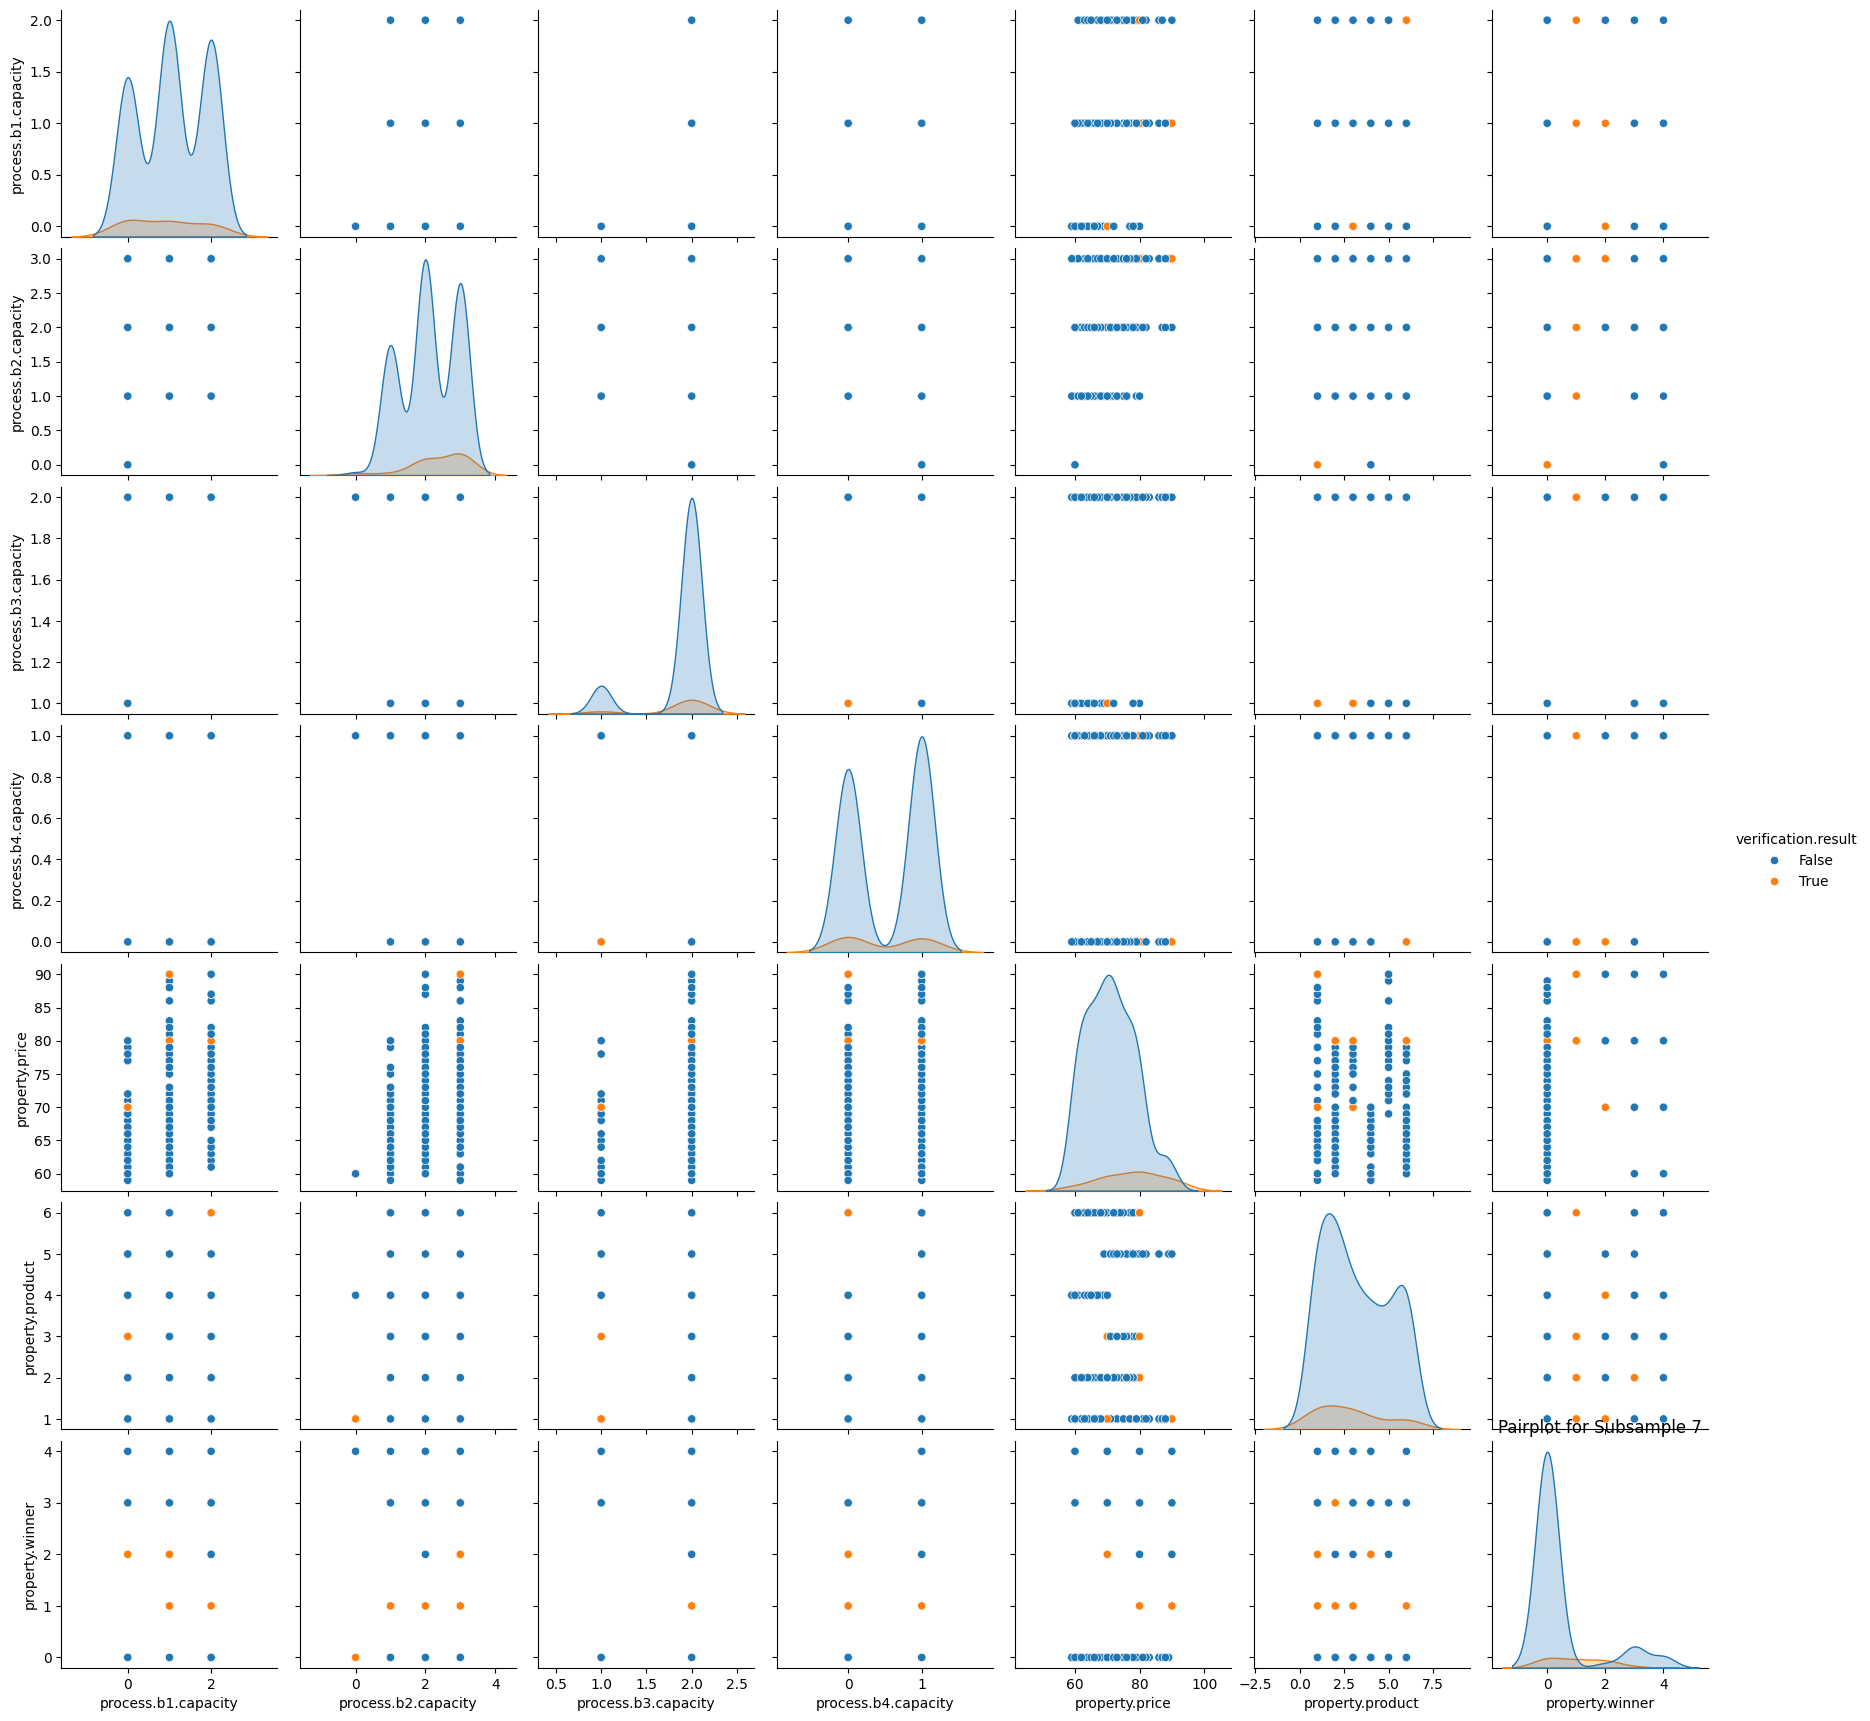

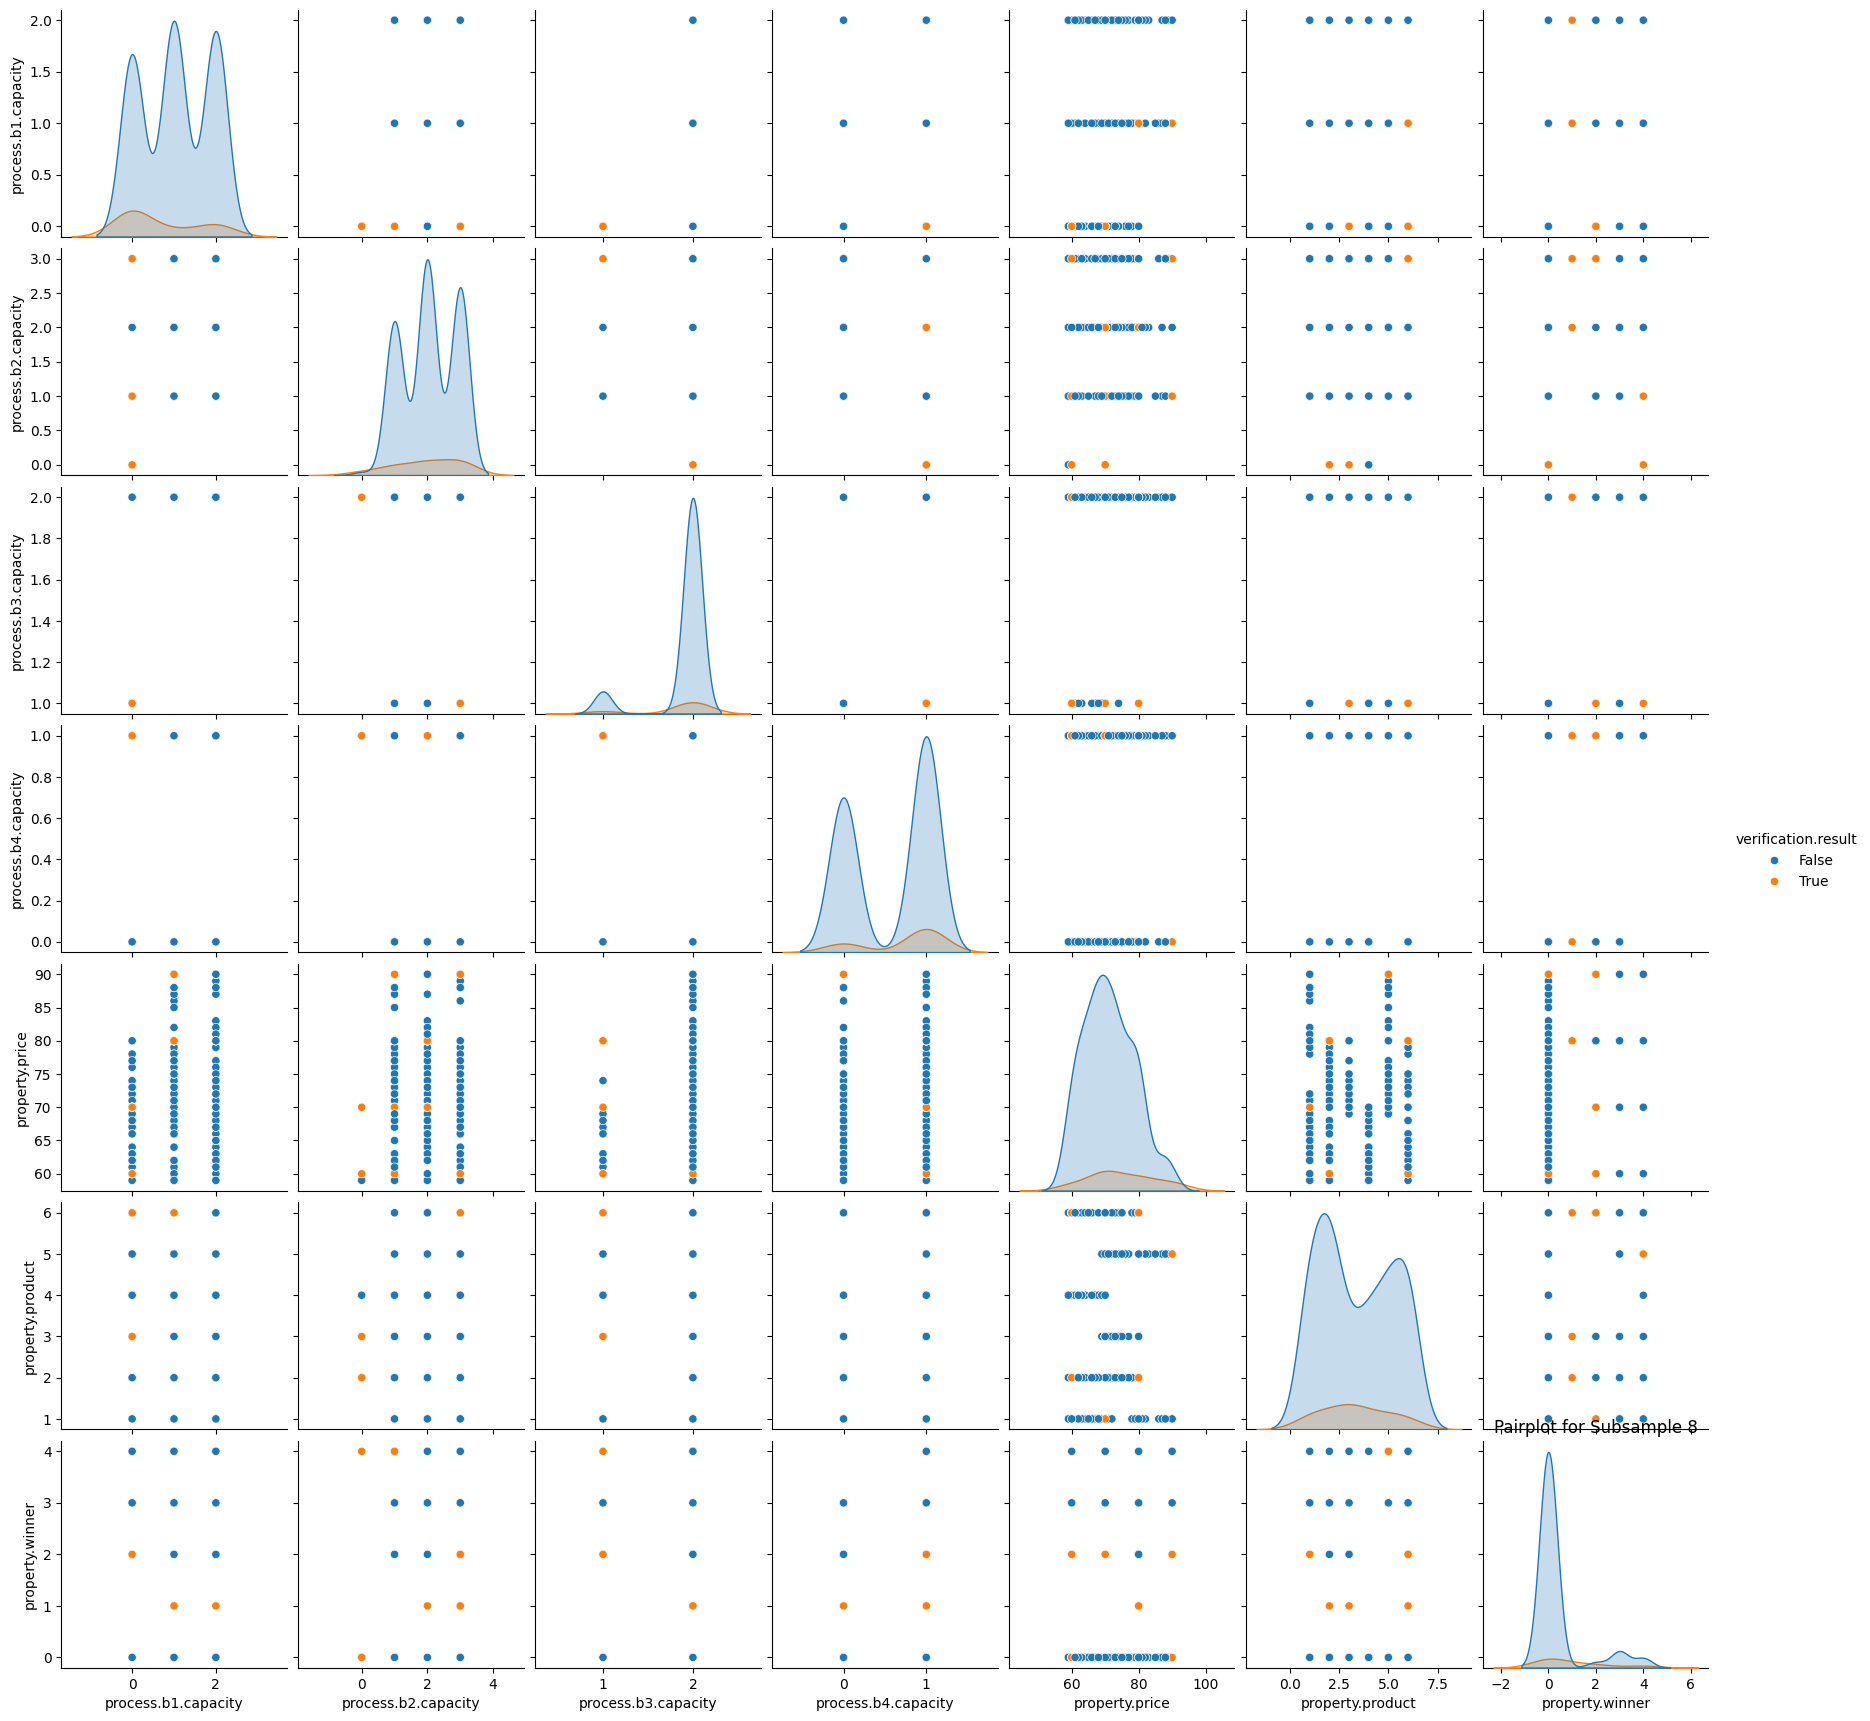

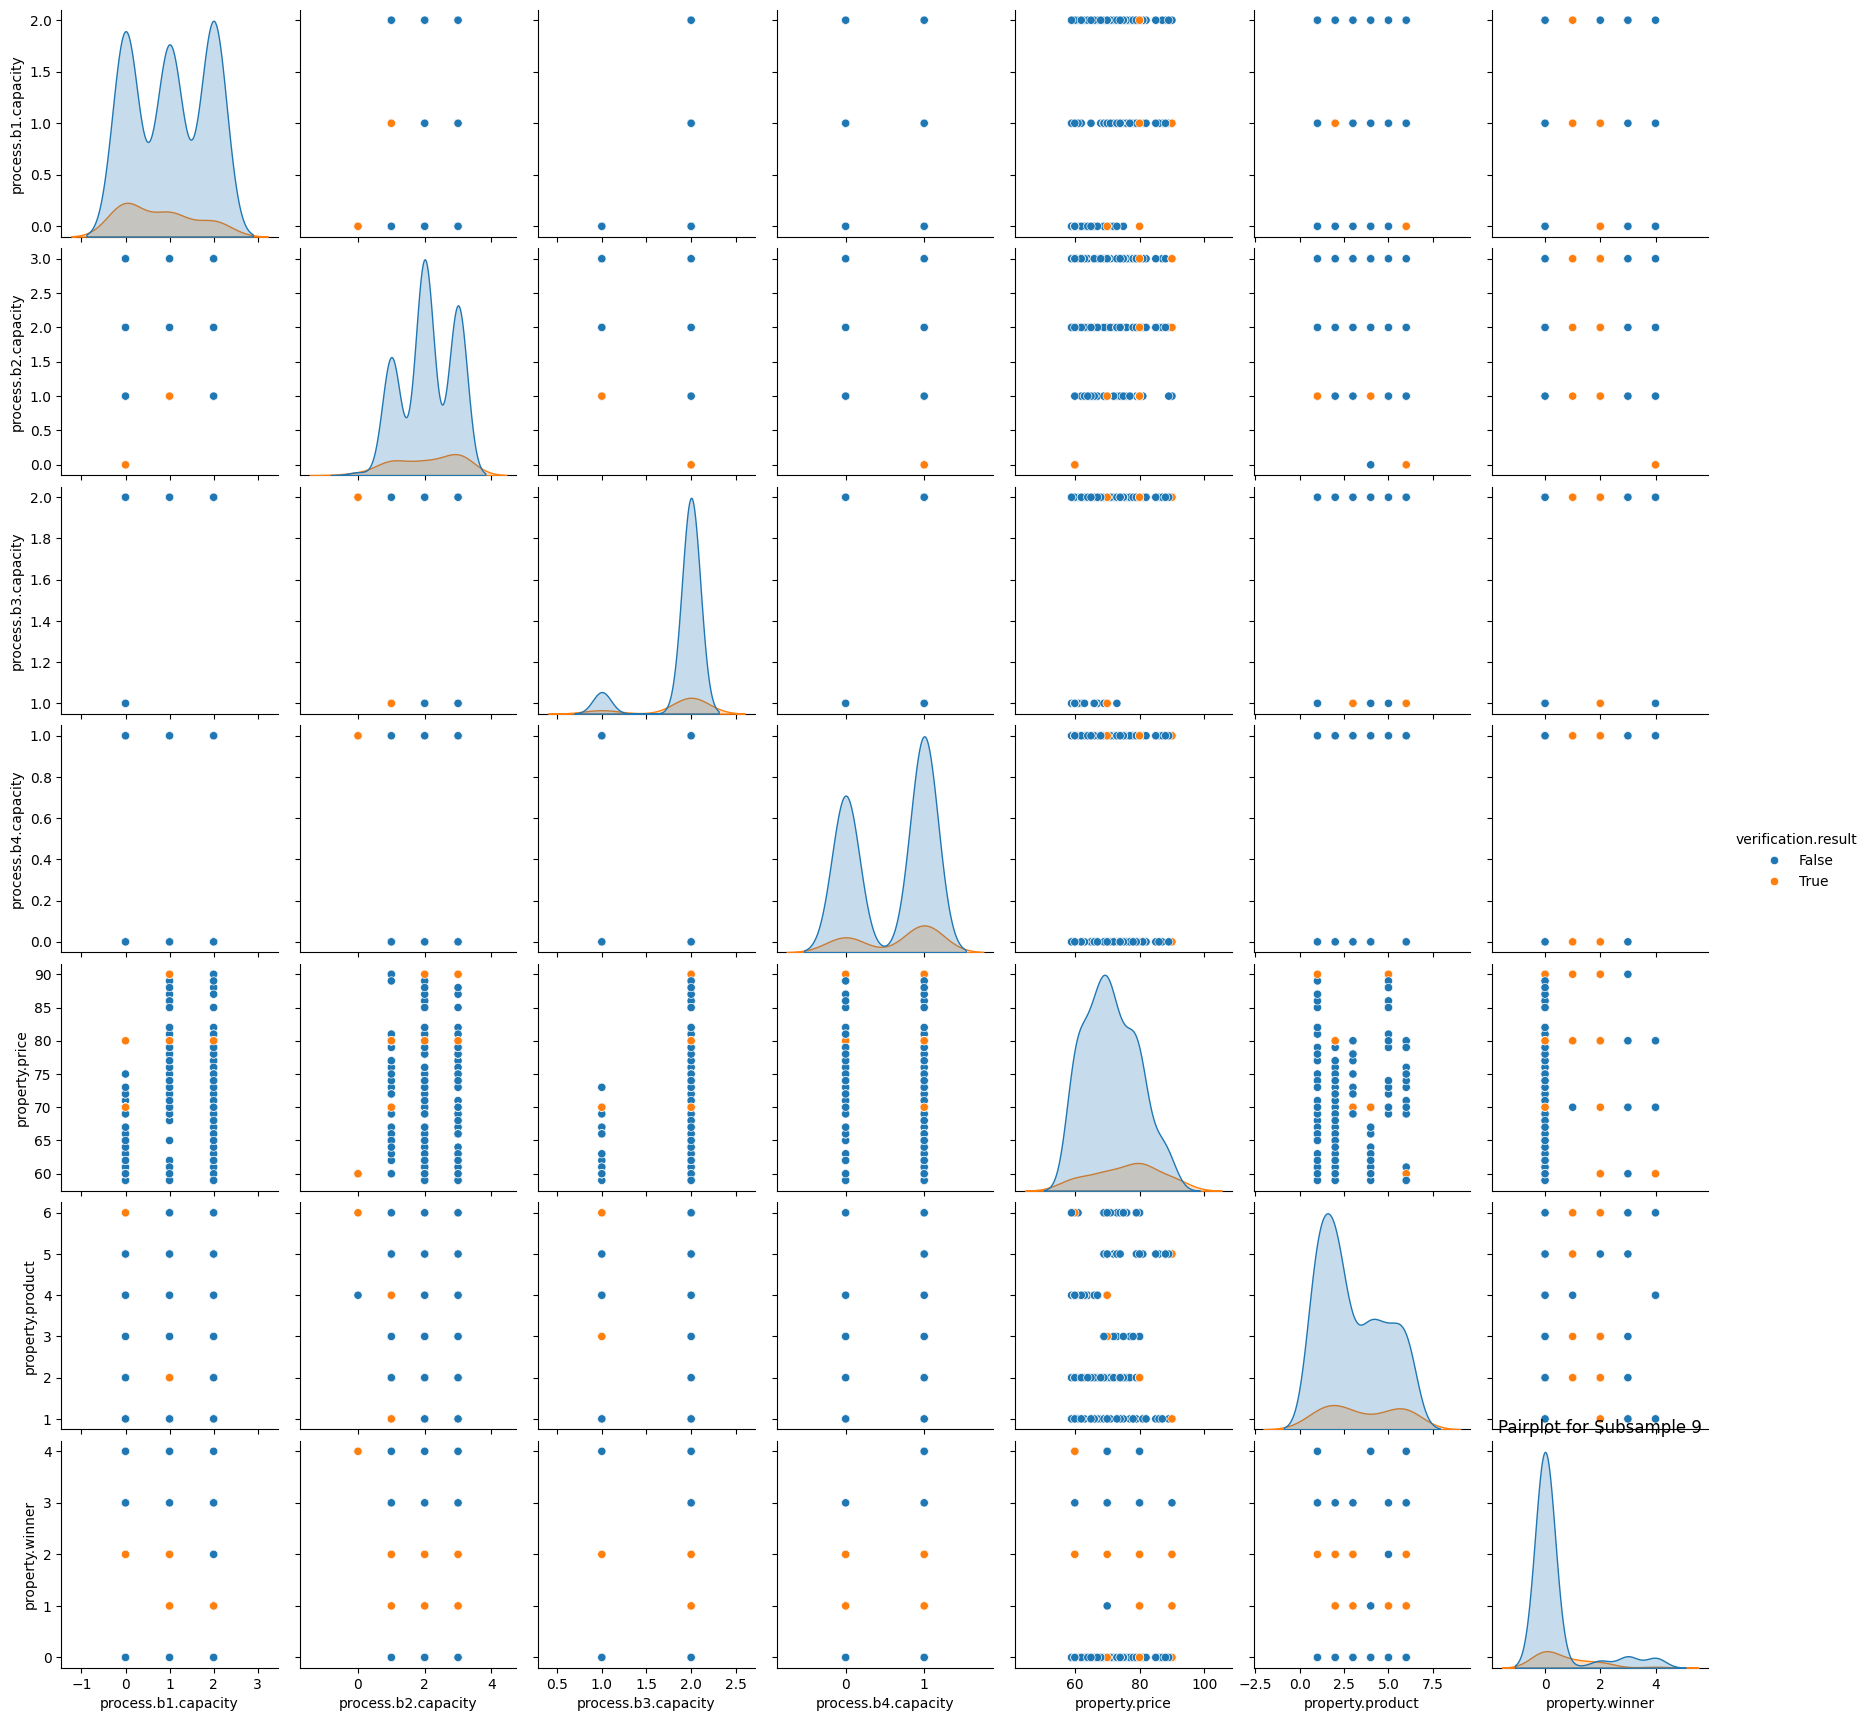

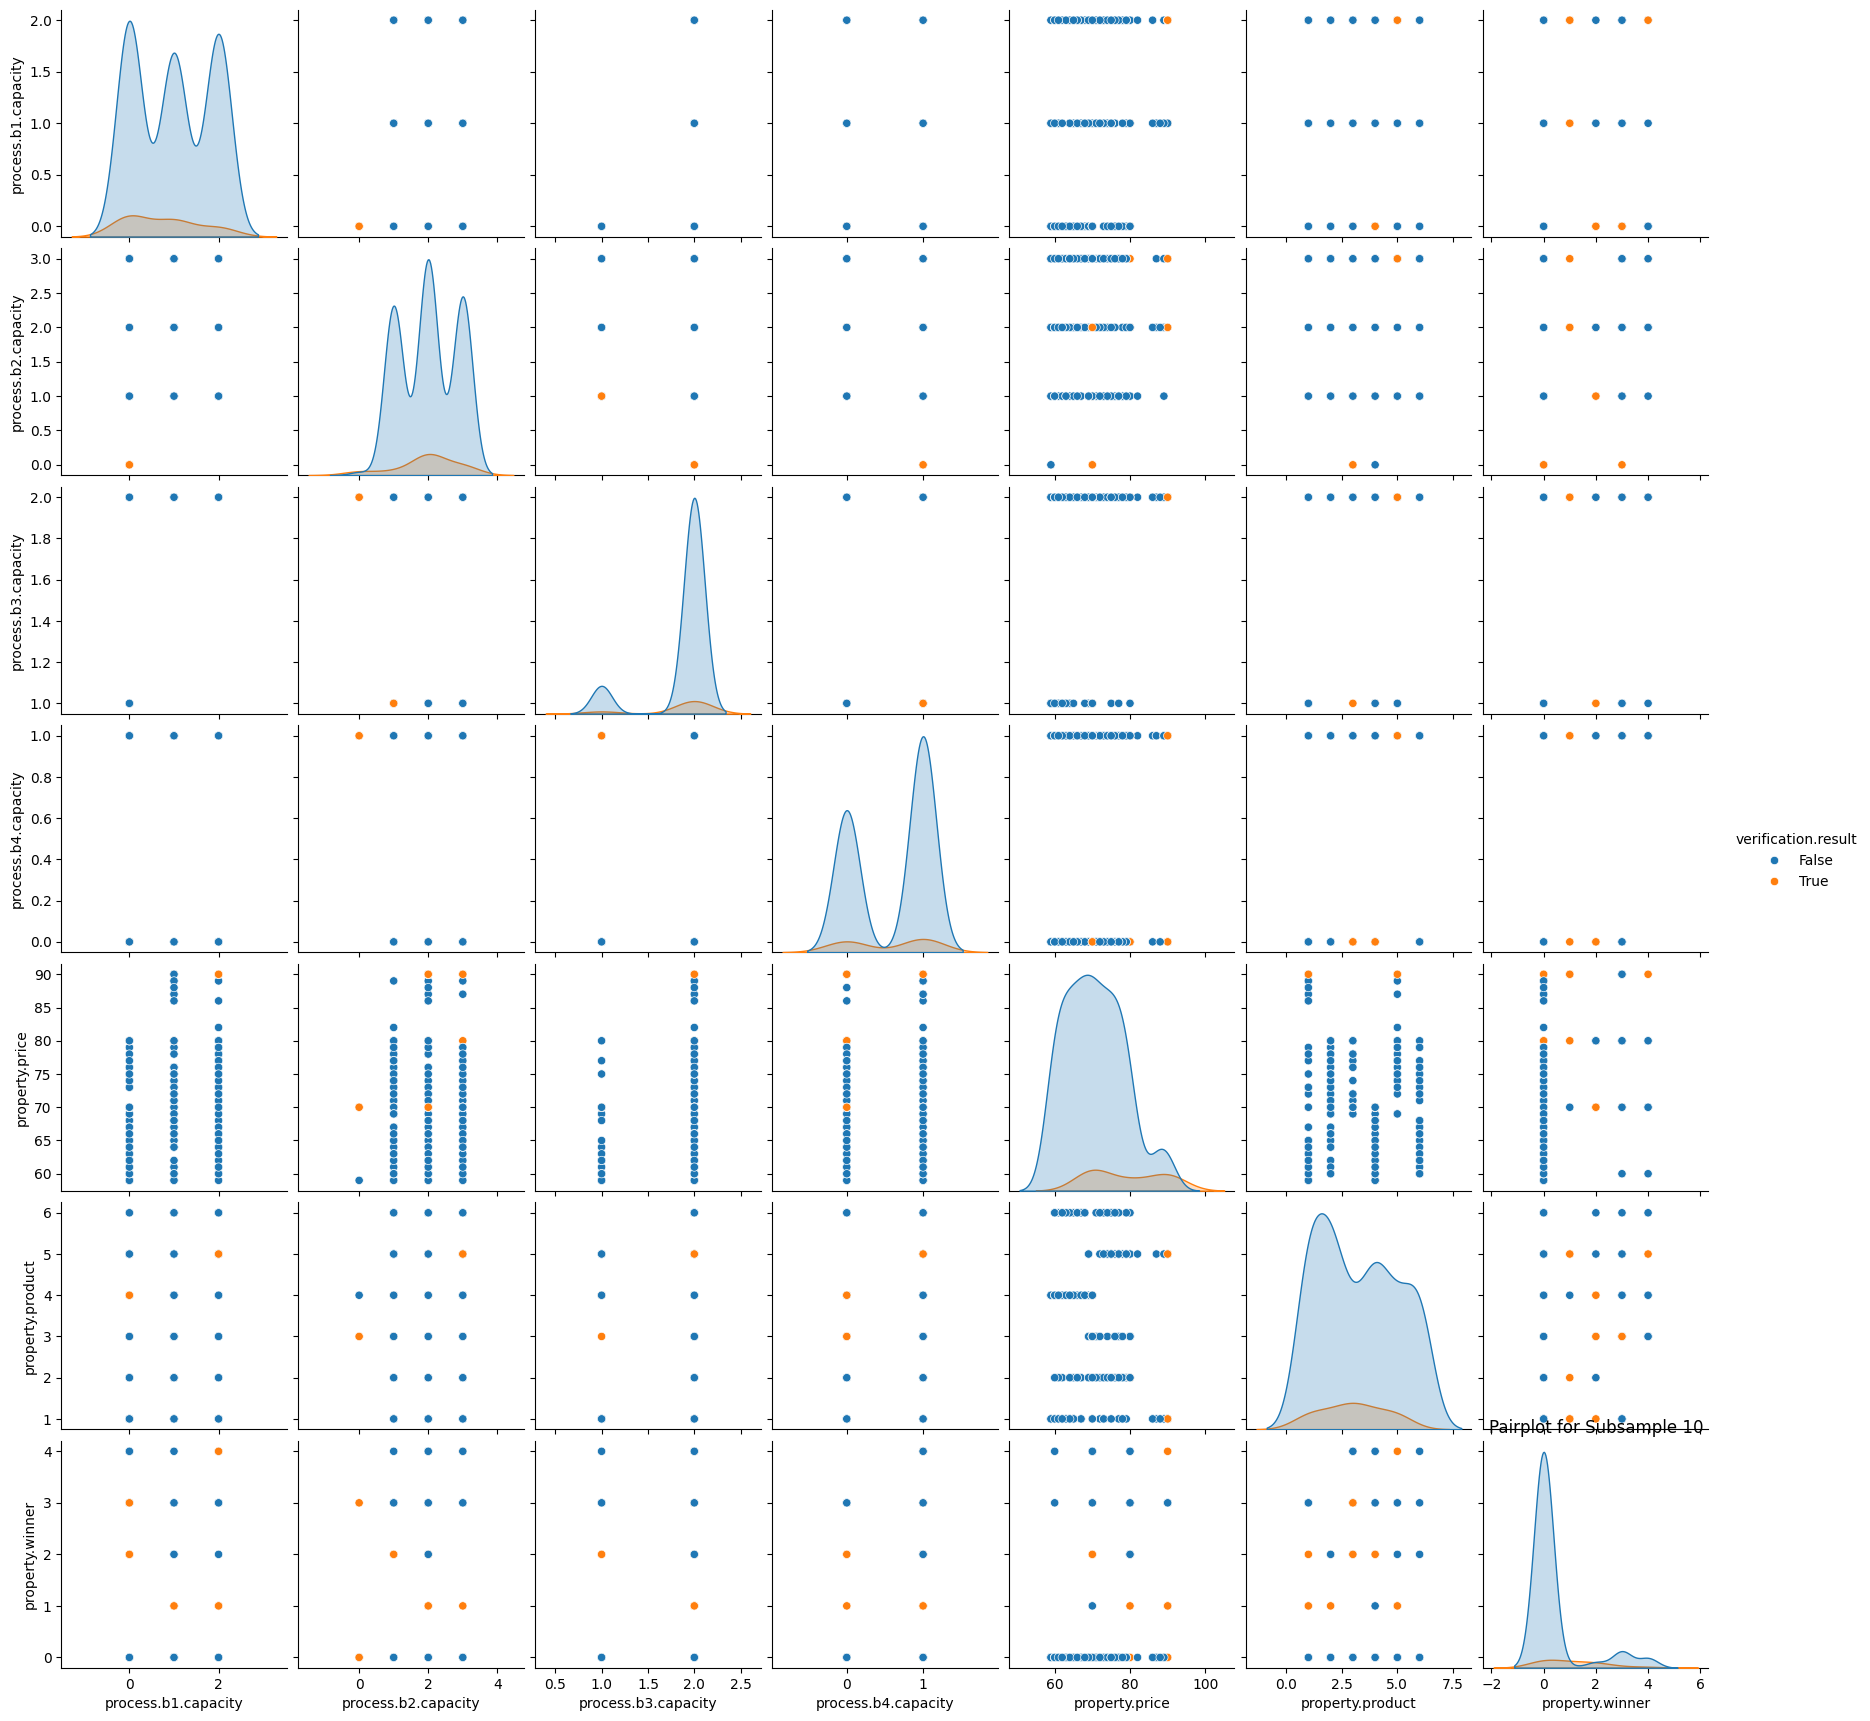

In [5]:
for i in range(10):
    subsample_X = X.sample(frac=0.1, random_state=i)
    subsample_y = y.sample(frac=0.1, random_state=i)
    subsample = pd.concat([subsample_X, subsample_y], axis=1)
    sns.pairplot(subsample, hue=subsample.columns[-1])
    plt.title(f'Pairplot for Subsample {i+1}')
    plt.show()


**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

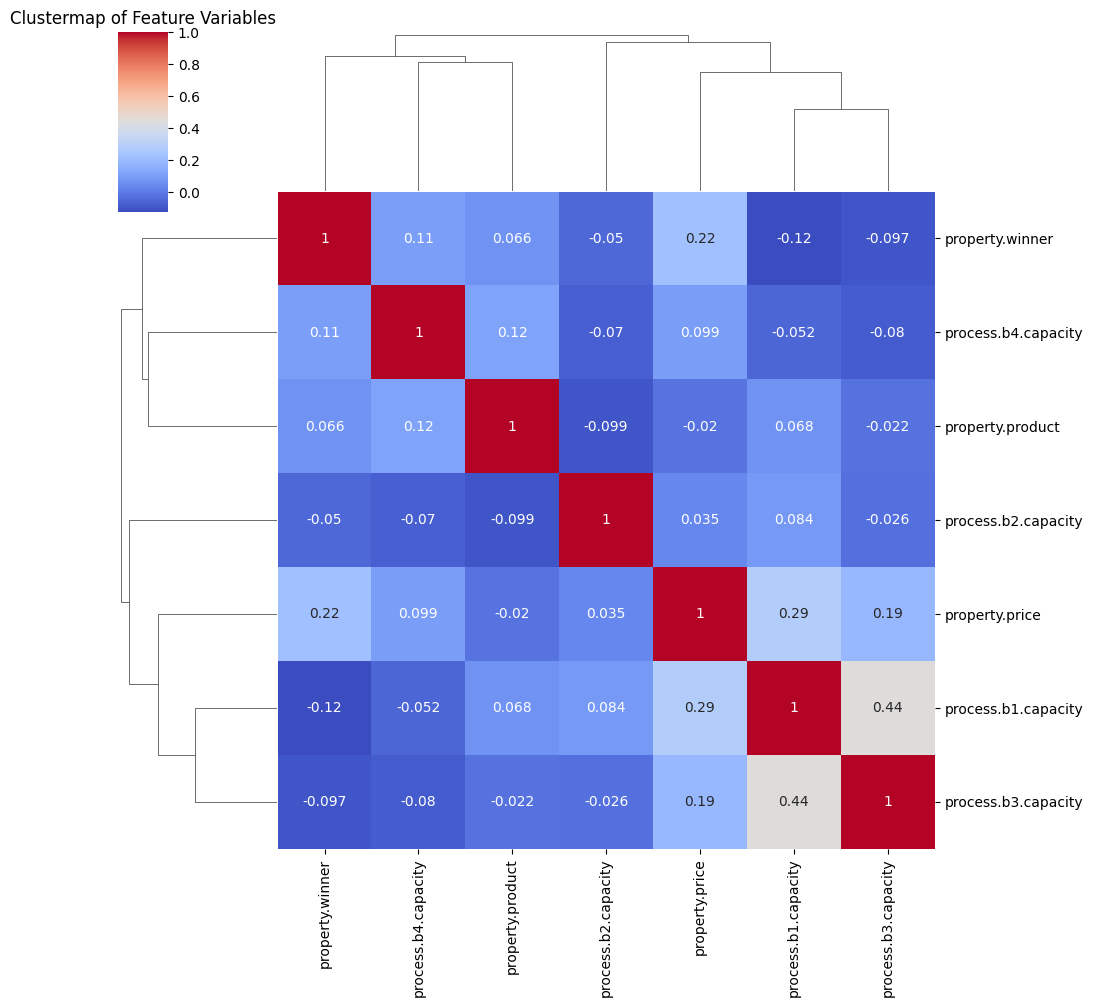

In [6]:
sns.clustermap(X.corr(), cmap='coolwarm', annot=True)
plt.title('Clustermap of Feature Variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initial SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print('Initial SVM Model Performance:')
print(classification_report(y_test, y_pred))

# GridSearch for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f'Best Parameters: {grid_search.best_params_}')
y_pred_best = grid_search.predict(X_test)
print('Best SVM Model Performance:')
print(classification_report(y_test, y_pred_best))


Initial SVM Model Performance:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       534
        True       0.00      0.00      0.00        79

    accuracy                           0.87       613
   macro avg       0.44      0.50      0.47       613
weighted avg       0.76      0.87      0.81       613

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s


c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................